# Linear Regression - Exercise 1

**2. Trong phần xây dựng công thức, chúng ta tính loss $L = (output − label)^2$. Các bạn hãy xây dựng công thức cho bài toán linear regression với cách tính loss $L = (label − output)^2$.**

$\textbf{x}\in\mathbb{R}^m$ : feature vector

$\textbf{w}\in\mathbb{R}^m$ : weight vector

$y\in\mathbb{R}$ : label

**Linear Regression with $L = (output − label)^2$:**

- 1-Sample 
    1. Pick a sample $(x, y)$ from training data
    2. Calculate output o 
        $$o = \textbf{w}^T\textbf{x} + b$$
    3. Calculate losses
        $$L = (o − y)^2$$
    4. Calculate gradients
        $$\textbf{L_w'} = \frac{\partial L}{\partial \textbf{w}} = \frac{\partial L}{\partial o} \frac{\partial o}{\partial \textbf{w}} = 2\textbf{x}(o − y)$$
        
        $$L_b'= \frac{\partial L}{\partial b} = \frac{\partial L}{\partial o} \frac{\partial o}{\partial b} = 2(o − y)$$
    5. Update weights
        $$\textbf{w} = \textbf{w} - \eta \textbf{L_w'}$$
        $$b = b - \eta L_b'$$
        
**Linear Regression with $L = (label − output)^2$:**
- 1-Sample 
    1. Pick a sample $(x, y)$ from training data
    2. Calculate output o 
        $$o = \textbf{w}^T\textbf{x} + b$$
    3. Calculate losses
        $$L = (y − o)^2$$
    4. Calculate gradients
        $$\textbf{L_w'} = \frac{\partial L}{\partial \textbf{w}} = \frac{\partial L}{\partial o} \frac{\partial o}{\partial \textbf{w}} = -2\textbf{x}(y − o) = 2\textbf{x}(o − y)$$
        
        $$L_b'= \frac{\partial L}{\partial b} = \frac{\partial L}{\partial o} \frac{\partial o}{\partial b} = -2(y − o) = 2(o − y)$$
    5. Update weights
        $$\textbf{w} = \textbf{w} - \eta \textbf{L_w'}$$
        $$b = b - \eta L_b'$$
   
The gradient $L_w'$ and $L_b'$ don't change when we swap the output $o$ and the label $y$ in the loss function formula.

**3. Trong cách cài đặt vectorization, vector tham số $theta=[w,b]$. Các bạn hãy chỉnh lại code với cách chọn $theta=[b,w]$.**

In [1]:
# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# forward
def predict(x,theta):
    return x.dot(theta)

# compute gradient
def gradient(z,y,x):
    dtheta = 2*x*(z-y)
    
    return dtheta

# update weights
def update_weight(theta,n,dtheta):
    dtheta_new = theta - n*dtheta
    
    return dtheta_new

# vector [b, x]
data = np.c_[np.ones((data_size, 1)), areas]

# init weight
n = 0.01
theta = np.array([0.04, -0.34]) #[b, w]

# how long
epoch_max = 10

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(data_size):
        # get a sample
        x = data[i]
        y = prices[i:i+1]

        # predict z
        z = predict(x, theta)

        # compute loss
        loss = (z-y)*(z-y)
        losses.append(loss[0])

        # compute gradient
        dtheta = gradient(z,y,x)

        # update weights
        theta = update_weight(theta,n,dtheta)

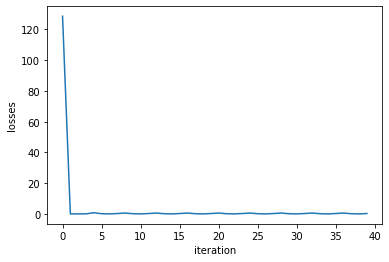

In [2]:
# plotting
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

**4. Cài đặt linear regression cho bài toán advertising theo 2 cách (cách thông thường và vectorization) dùng 1 sample (stochastic gradient descent).**

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
%matplotlib inline

In [4]:
# read data
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
data_size = df.shape[0]

In [7]:
# check nan values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# min-max normalization
normalized_df = (df - df.min()) / (df.max() - df.min())
normalized_df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732


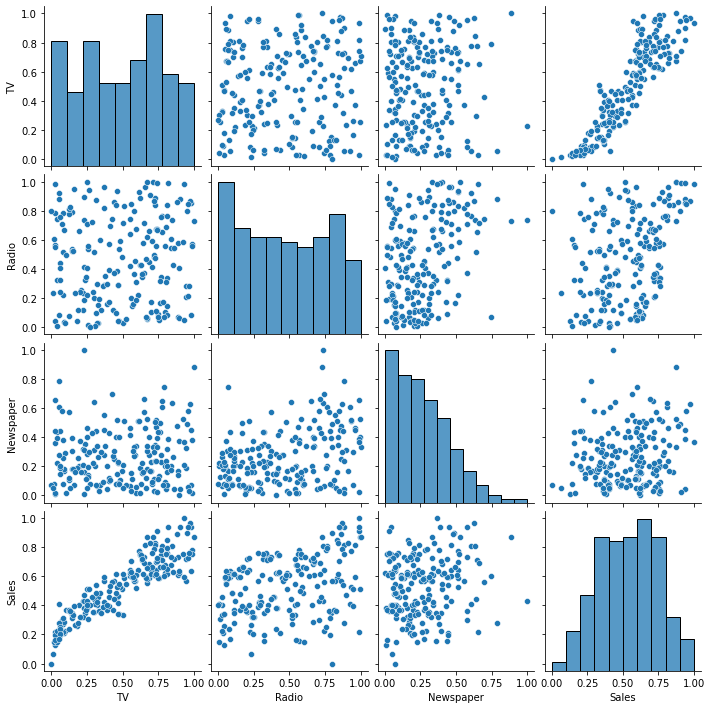

In [9]:
# visualize the relationship between the features
sns.pairplot(normalized_df)

- **Cách thông thường:**

In [10]:
# forward
def predict(x_1, x_2, x_3 , w_1, w_2, w_3, b):
    return x_1*w_1 + x_2*w_2 + x_3*w_3 + b

# compute gradient
def gradient(z, y, x_1, x_2, x_3):
    dw_1 = 2*x_1*(z-y)
    dw_2 = 2*x_2*(z-y)
    dw_3 = 2*x_3*(z-y)
    db = 2*(z-y)
    
    return (dw_1, dw_2, dw_3, db)

# update weights
def update_weight(w_1, w_2, w_3, b, n, dw_1, dw_2, dw_3, db):
    w_1_new = w_1 - n*dw_1
    w_2_new = w_2 - n*dw_2
    w_3_new = w_3 - n*dw_3
    b_new = b - n*db
    
    return (w_1_new, w_2_new, w_3_new, b_new)

In [11]:
# init weights
b = 0.04
w_1 = -0.34
w_2 = -0.34
w_3 = -0.34
n = 0.01

# how long
epoch_max = 10

# to plot
losses = []

# train
for epoch in range(epoch_max):
    # shuffle data
    normalized_df = shuffle(normalized_df)
    
    # convert to numpy array
    X = normalized_df.iloc[:, :-1].to_numpy()
    Y = normalized_df.iloc[:, -1].to_numpy()
    
    for i in range(data_size):
        # get a sample
        x_1 = X[i][0] # tv
        x_2 = X[i][1] # radio
        x_3 = X[i][2] # newspaper 
        y = Y[i] # sales
        print('sample: ', x_1, x_2, x_3, y)
        
        # predict z
        z = predict(x_1, x_2, x_3 , w_1, w_2, w_3, b)
        print('z: ', z)

        # compute loss
        loss = (z-y)*(z-y)
        losses.append(loss)
        print('Loss: ', loss)

        # compute gradient
        (dw_1, dw_2, dw_3, db) = gradient(z, y, x_1, x_2, x_3)
        print('dw: ', dw_1, dw_2, dw_3)
        print('db: ', db)

        # update weights
        (w_1, w_2, w_3, b) = update_weight(w_1, w_2, w_3, b, n, dw_1, dw_2, dw_3, db)
        print('w_new: ', w_1, w_2, w_3)
        print('b_new: ', b)
        print('\n\n')

sample:  0.16097396009469056 0.9475806451612903 0.07211961301671063 0.3937007874015748
z:  -0.36142923421271517
Loss:  0.570221349543198
dw:  -0.24311253993128307 -1.4310931861238558 -0.10891936987224586
db:  -1.51026004322858
w_new:  -0.3375688746006872 -0.3256890681387615 -0.33891080630127757
b_new:  0.0551026004322858



sample:  0.4693946567467028 0.04233870967741936 0.2313104661389622 0.34251968503937014
z:  -0.19553329707539083
Loss:  0.28950101156258723
dw:  -0.505118389702596 -0.045560938001653145 -0.2489145722008481
db:  -1.0761059642295219
w_new:  -0.3325176907036612 -0.32523345875874493 -0.3364216605792691
b_new:  0.06586366007458101



sample:  0.5099763273588097 0.8326612903225805 0.5118733509234829 0.5866141732283465
z:  -0.5467270847623902
Loss:  1.2844624070640256
dw:  -1.1559544247886584 -1.887378788508767 -1.1602543749351077
db:  -2.2666825159814734
w_new:  -0.32095814645577464 -0.3063596708736573 -0.324819116829918
b_new:  0.08853048523439574



sample:  0.3939803855

z:  0.22217726765854812
Loss:  0.0011375944536089974
dw:  -0.012044986751780224 -0.0027200196897157656 -0.01251831049458633
db:  -0.06745648830495099
w_new:  -0.20941880511358887 -0.2145717519147073 -0.2708906038302118
b_new:  0.31921425606065784



sample:  0.4957727426445723 0.4818548387096774 0.16534740545294635 0.5118110236220472
z:  0.06720662527272303
Loss:  0.19767307103156456
dw:  -0.4408454839229688 -0.4284695613124535 -0.14702836744005796
db:  -0.8892087966986484
w_new:  -0.20501035027435918 -0.21028705630158276 -0.26942032015581124
b_new:  0.3281063440276443



sample:  0.042272573554277985 0.32056451612903225 0.4335971855760774 0.15748031496062992
z:  0.13520956790820227
Loss:  0.000495986174273215
dw:  -0.0018828835857649352 -0.014278422505387084 -0.019313066485218702
db:  -0.044541494104855306
w_new:  -0.20499152143850152 -0.2101442720765289 -0.26922718949095903
b_new:  0.3285517589686929



sample:  0.16672303009807238 0.23387096774193547 0.1591908531222515 0.26771653543

b_new:  0.5112204578590762



sample:  0.22691917483936422 0.7379032258064516 1.0 0.42913385826771655
z:  0.1976225065034486
Loss:  0.053597505995718615
dw:  -0.10506872981658695 -0.34166594655533095 -0.4630227035285359
db:  -0.4630227035285359
w_new:  -0.08213226708024987 -0.09758293130548104 -0.21556399311701394
b_new:  0.5158506848943616



sample:  0.05816706121068651 0.7580645161290323 0.18733509234828497 0.2519685039370079
z:  0.3967164341276493
Loss:  0.020951963294474785
dw:  0.016839123431038428 0.21945653932129497 0.05423273373897381
db:  0.2894958603812827
w_new:  -0.08230065831456025 -0.09977749669869398 -0.21610632045440367
b_new:  0.5129557262905488



sample:  0.14305038890767668 0.5221774193548386 0.17766051011433595 0.31496062992125984
z:  0.4106874702446216
Loss:  0.0091636279582944
dw:  0.027387523474319934 0.0999727888860915 0.03401375856696407
db:  0.19145368064672352
w_new:  -0.08257453354930346 -0.1007772245875549 -0.21644645804007331
b_new:  0.5110411894840815



dw:  0.01934739610386431 0.3869241633613962 0.2053842038484682
db:  0.5200931843556978
w_new:  -0.015821804313791585 -0.05210375040261779 -0.1919408774134009
b_new:  0.5907067946848951



sample:  0.2560027054447075 0.5383064516129032 0.19349164467897978 0.40157480314960636
z:  0.5214696289287447
Loss:  0.014374769248609937
dw:  0.06138679953656255 0.1290803164638304 0.046397294057010444
db:  0.2397896515582767
w_new:  -0.01643567230915721 -0.053394553567256094 -0.192404850353971
b_new:  0.5883088981693123



sample:  0.9567128846804195 0.8467741935483871 0.5795954265611258 0.9409448818897638
z:  0.41585457735262754
Loss:  0.2757198279189025
dw:  -1.004721319942887 -0.8892658383290211 -0.6086798780826259
db:  -1.0501806090742725
w_new:  -0.006388459109728338 -0.044501895183965884 -0.18631805157314474
b_new:  0.598810704260055



sample:  0.4808927967534664 0.5907258064516129 0.10817941952506595 0.5275590551181103
z:  0.5492943437044351
Loss:  0.0004724227699308205
dw:  0.02090468743304

dw:  -0.13731948629529148 -0.10445619619201715 -0.10269044589595841
db:  -0.24789604455139003
w_new:  0.02648198290973543 -0.04171805428195962 -0.1736799219181888
b_new:  0.5809973151033294



sample:  0.8461278322624283 0.7358870967741935 0.6332453825857519 0.8110236220472441
z:  0.4627226714455881
Loss:  0.12131355219001722
dw:  -0.5894142566150447 -0.5126203506838889 -0.4411199374374535
db:  -0.696601901203312
w_new:  0.03237612547588588 -0.036591850775120734 -0.16926872254381425
b_new:  0.5879633341153625



sample:  0.977341900574907 0.8528225806451613 0.44766930518909415 0.9370078740157479
z:  0.5126231101011605
Loss:  0.18010242784284014
dw:  -0.8295380234786323 -0.723849819096252 -0.3799680647889622
db:  -0.8487695278291749
w_new:  0.0406715057106722 -0.029353352584158214 -0.16546904189592462
b_new:  0.5964510293936542



sample:  0.9469056476158269 0.28024193548387094 0.3227792436235708 0.5708661417322836
z:  0.5733270953207206
Loss:  6.056292564440993e-06
dw:  0.0046605817028

z:  0.5607261727544178
Loss:  0.002856587751458495
dw:  -0.04862109555041752 -0.08986863783016216 -0.042870461477519314
db:  -0.10689411118407777
w_new:  0.1175999454898985 0.018126624087309126 -0.15233063970824035
b_new:  0.5553065825731823



sample:  0.3608386878593169 0.282258064516129 0.0932277924362357 0.3897637795275591
z:  0.588656129166781
Loss:  0.0395581667450105
dw:  0.14353610893814664 0.11227793931246398 0.0370845893786412
db:  0.39778469927844384
w_new:  0.11616458440051702 0.017003844694184485 -0.15270148560202676
b_new:  0.5513287355803979



sample:  0.6658775786269868 0.07056451612903225 0.04925241864555849 0.594488188976378
z:  0.622359078339733
Loss:  0.0007767864739043761
dw:  0.03711720064690297 0.003933391644021878 0.0027454174218960094
db:  0.055741778726710045
w_new:  0.11579341239404799 0.016964510777744267 -0.15272893977624571
b_new:  0.5507713177931307



sample:  0.2516063577950625 0.7056451612903225 0.46086191732629733 0.4330708661417323
z:  0.52148964946

z:  0.5002338430170168
Loss:  0.001531644946577237
dw:  -0.02467025478117495 -0.06864621991760572 -0.03455829434127818
db:  -0.07827247144628147
w_new:  0.16203643893392064 0.03080393509680106 -0.1516455441958242
b_new:  0.4907154930154435



sample:  0.959080148799459 0.21370967741935482 0.05364995602462621 0.7244094488188976
z:  0.6445687472344701
Loss:  0.006374537629493598
dw:  -0.15314726391169178 -0.03412546116108593 -0.008566900257959675
db:  -0.15968140316885493
w_new:  0.16356791157303754 0.03114518970841192 -0.15155987519324463
b_new:  0.492312307047132



sample:  0.19918836658775788 0.24193548387096772 0.37642919964819704 0.3188976377952756
z:  0.4753766962041202
Loss:  0.02448569572051861
dw:  0.06233761609929624 0.07571567342363449 0.11780657343708972
db:  0.31295811681768926
w_new:  0.1629445354120446 0.030388032974175576 -0.15273794092761553
b_new:  0.4891827258789551



sample:  0.8613459587419683 0.5423387096774193 0.04573438874230431 0.7165354330708662
z:  0.63902957

Loss:  0.019790123275530286
dw:  0.12245639435723468 0.03233310589223116 0.07671061676602729
db:  0.28135474600959043
w_new:  0.22379049531213327 0.03947290127015983 -0.14144502501296474
b_new:  0.44378946730041474



sample:  0.8068988840040583 0.3125 0.23746701846965698 0.7519685039370079
z:  0.6031125214982207
Loss:  0.022158103507816513
dw:  -0.24022345221437014 -0.09303498902424198 -0.07069677266222081
db:  -0.29771196487757434
w_new:  0.22619272983427696 0.04040325116040225 -0.14073805728634253
b_new:  0.44676658694919047



sample:  0.6526885356780521 0.7137096774193548 0.662269129287599 0.6929133858267716
z:  0.5300297092614755
Loss:  0.026531092091427996
dw:  -0.21262461668652113 -0.232503312516592 -0.2157456613081231
db:  -0.32576735313059224
w_new:  0.22831897600114218 0.04272828428556817 -0.1385806006732613
b_new:  0.4500242604804964



sample:  0.0608725059181603 0.24395161290322578 0.20316622691292874 0.20078740157480315
z:  0.44619134480429234
Loss:  0.060223095352582356

sample:  0.29252620899560366 0.23790322580645162 0.22515391380826735 0.35433070866141736
z:  0.47797907433771347
Loss:  0.015288918334419043
dw:  0.07234077531957804 0.058832690120173156 0.0556798269360278
db:  0.24729673135259223
w_new:  0.2599576459530497 0.065018994086722 -0.13641866215196807
b_new:  0.414231703717429



sample:  0.6733175515725398 0.05241935483870968 0.18381706244503077 0.5511811023622047
z:  0.5675979253859296
Loss:  0.0002695120781923015
dw:  0.022107470165868198 0.0017211185428098606 0.0060353843658020895
db:  0.03283364604744965
w_new:  0.25973657125139105 0.06500178290129391 -0.1364790159956261
b_new:  0.41390336725695454



sample:  0.4639837673317552 0.9354838709677419 0.5162708883025506 0.5275590551181103
z:  0.5247648967655951
Loss:  7.807320898930316e-06
dw:  -0.0025928882378429626 -0.005227780143415488 -0.0028850852294220013
db:  -0.0055883167050303495
w_new:  0.2597625001337695 0.06505406070272807 -0.13645016514333186
b_new:  0.41395925042400483



samp

sample:  0.1487994589110585 0.5201612903225806 0.1785400175901495 0.3346456692913386
z:  0.46783192980268445
Loss:  0.017738579988996084
dw:  0.039636086996951085 0.13855667424164206 0.047558154588923846
db:  0.2663725210226917
w_new:  0.31689608940417535 0.08717146130408586 -0.11999283312756824
b_new:  0.39322993389901856



sample:  0.39398038552587084 0.29637096774193544 0.044854881266490766 0.4055118110236221
z:  0.5385336034375201
Loss:  0.01769479725700617
dw:  0.10481595411713979 0.07884759469694759 0.011933353409162354
db:  0.266043584827796
w_new:  0.315847929863004 0.08638298535711639 -0.12011216666165986
b_new:  0.3905694980507406



sample:  0.0 0.7983870967741935 0.07387862796833772 0.0
z:  0.4506628368654287
Loss:  0.203096992531596
dw:  0.0 0.7196067878980232 0.06658870412787335
db:  0.9013256737308574
w_new:  0.315847929863004 0.07918691747813615 -0.12077805370293859
b_new:  0.381556241313432



sample:  0.09435238417314847 0.030241935483870965 0.287598944591029 0.22440

sample:  0.6090632397700373 0.21774193548387097 0.5109938434476693 0.6417322834645669
z:  0.5100949378702122
Loss:  0.017328390755127574
dw:  -0.16035093636485143 -0.057325940823348014 -0.13453174633301684
db:  -0.2632746911887094
w_new:  0.33687437879567667 0.07872880226991644 -0.1191114889742265
b_new:  0.35306147016477457



sample:  0.7696990192762937 0.3407258064516129 0.227792436235708 0.7440944881889764
z:  0.6120455875304027
Loss:  0.017436912165137857
dw:  -0.20327581866683375 -0.08998493633588285 -0.060159481566526965
db:  -0.26409780131714733
w_new:  0.338907136982345 0.07962865163327526 -0.11850989415856124
b_new:  0.35570244817794605



sample:  0.6658775786269868 0.07056451612903225 0.04925241864555849 0.594488188976378
z:  0.5811551702829255
Loss:  0.0001777693874799536
dw:  -0.017756316406768995 -0.0018816760252856337 -0.0013133668369979588
db:  -0.026666037386904984
w_new:  0.3390847001464127 0.07964746839352811 -0.11849676049019126
b_new:  0.3559691085518151



sample

b_new:  0.3578973865368079



sample:  0.5539398038552588 0.42137096774193544 0.41424802110817943 0.6259842519685039
z:  0.5421874001365029
Loss:  0.007021912376954334
dw:  -0.09283682333501367 -0.0706191211003557 -0.0694253600930035
db:  -0.16759370366400206
w_new:  0.3531291565843724 0.08694947939904345 -0.11312268074687738
b_new:  0.35957332357344796



sample:  0.12242137301318903 0.7782258064516129 0.5743183817062445 0.3622047244094489
z:  0.405501773558546
Loss:  0.00187463446501933
dw:  0.01060096840850399 0.06738976198206242 0.04973258239993035
db:  0.0865940982981942
w_new:  0.35302314690028735 0.08627558177922283 -0.11362000657087669
b_new:  0.35870738259046603



sample:  0.729455529252621 0.840725806451613 0.345646437994723 0.8267716535433072
z:  0.6494838265632996
Loss:  0.031430973595293094
dw:  -0.25864717131949705 -0.29810090262364175 -0.12255781179092873
db:  -0.3545756539600151
w_new:  0.35560961861348234 0.08925659080545925 -0.1123944284529674
b_new:  0.3622531391300

z:  0.5807581724212936
Loss:  3.429274545220483e-05
dw:  -0.005972843569182181 -0.009752130376261568 -0.005995061512233629
db:  -0.011712001614105905
w_new:  0.3654322144198726 0.09988904534841495 -0.10889689962295548
b_new:  0.3672235427804199



sample:  0.24585728779168078 0.34274193548387094 0.11081794195250659 0.36614173228346464
z:  0.47923615032452505
Loss:  0.01279034739204613
dw:  0.055610173767907285 0.07752439946363011 0.025065781307253492
db:  0.22618883608212081
w_new:  0.36487611268219355 0.09911380135377865 -0.10914755743602803
b_new:  0.3649616544195987



sample:  0.10415962123774096 0.4959677419354839 0.016710642040457344 0.3700787401574803
z:  0.45030033460544727
Loss:  0.006435504215774082
dw:  0.0167117017855758 0.07957464610564463 0.002681108697469432
db:  0.1604431888959339
w_new:  0.3647089956643378 0.0983180548927222 -0.10917436852300272
b_new:  0.3633572225306394



sample:  0.05478525532634427 0.8810483870967742 0.7836411609498681 0.2795275590551181
z:  0.384

dw:  -0.12830401001576075 -0.07376055576052792 -0.04497667420456629
db:  -0.20212837379680582
w_new:  0.37981869906626275 0.10945560661418799 -0.1042811608064604
b_new:  0.36477930419044596



sample:  0.02603990530943524 0.5483870967741935 0.0158311345646438 0.16141732283464566
z:  0.43304290039641274
Loss:  0.07378045438576354
dw:  0.014146208638658144 0.2979119237774219 0.008600282139158854
db:  0.5432511551235342
w_new:  0.37967723697987615 0.10647648737641377 -0.10436716362785199
b_new:  0.3593467926392106



sample:  0.16672303009807238 0.23387096774193547 0.1591908531222515 0.2677165354330709
z:  0.4309351933763759
Loss:  0.02664033030081361
dw:  0.05442461844169725 0.07634421097348139 0.05196583480692736
db:  0.32643731588661007
w_new:  0.3791329907954592 0.10571304526667896 -0.10488682197592127
b_new:  0.3560824194803445



sample:  0.6702739262766318 0.9959677419354838 0.525065963060686 0.8700787401574803
z:  0.6604196605960351
Loss:  0.04395692964255243
dw:  -0.2810580288743

sample:  0.16672303009807238 0.23387096774193547 0.1591908531222515 0.2677165354330709
z:  0.39464034920470015
Loss:  0.016109654502335223
dw:  0.04232224564721895 0.05936759031253626 0.04041022039167087
db:  0.2538476275432585
w_new:  0.3830861152834087 0.10522758327334297 -0.11010224739046816
b_new:  0.3208764550972745



sample:  0.22691917483936422 0.7379032258064516 1.0 0.42913385826771655
z:  0.3753515660205518
Loss:  0.002892534959359437
dw:  -0.02440846675539232 -0.07937225388089636 -0.10756458449432948
db:  -0.10756458449432948
w_new:  0.3833301999509626 0.10602130581215194 -0.10902660154552486
b_new:  0.3219521009422178



sample:  0.44098748731822796 0.8629032258064515 0.2515391380826737 0.5669291338582677
z:  0.5550575920404606
Loss:  0.00014093350513194367
dw:  -0.010470402793656079 -0.020487983459763933 -0.005972314793127251
db:  -0.02374308363561428
w_new:  0.3834349039788992 0.10622618564674959 -0.10896687839759359
b_new:  0.32218953177857396



sample:  0.9232330064254

w_new:  0.4077337349080389 0.1152790768275374 -0.10345078952623488
b_new:  0.3058749660111508



sample:  0.576936083868786 0.8004032258064516 0.32893579595426564 0.5669291338582677
z:  0.5993523474560298
Loss:  0.0010512647800061067
dw:  0.037412243759068105 0.05190328950932082 0.021330311144350106
db:  0.06484642719552425
w_new:  0.4073596124704482 0.11476004393244418 -0.10366409263767838
b_new:  0.3052265017391955



sample:  0.14338856949611092 0.5383064516129032 0.3060686015831135 0.3346456692913386
z:  0.39368496201004155
Loss:  0.0034856380847246913
dw:  0.016931119453993948 0.063562464338281 0.03614014752173902
db:  0.1180785854374059
w_new:  0.4071903012759083 0.11412441928906138 -0.10402549411289577
b_new:  0.3040457158848215



sample:  0.4687182955698344 0.2923387096774194 0.08707124010554088 0.46456692913385833
z:  0.5192086165740801
Loss:  0.0029857140063148926
dw:  0.05122311720808078 0.03194776080174259 0.009515438973758939
db:  0.1092833748804436
w_new:  0.406678070103

b_new:  0.31222342462924085



sample:  0.7101792357118701 0.594758064516129 0.07915567282321899 0.6614173228346456
z:  0.6871866797617662
Loss:  0.0006640597564373368
dw:  0.03660172441457774 0.030653065699599063 0.004079581571575815
db:  0.051538713854241136
w_new:  0.42961727603628347 0.12972808188495877 -0.09783651477939666
b_new:  0.3117080374906984



sample:  0.22387554954345623 0.23588709677419353 0.3210202286719437 0.3188976377952756
z:  0.40708252151566393
Loss:  0.0077765737167784146
dw:  0.03948487860865546 0.041603352400344504 0.056618263074655666
db:  0.1763697674407767
w_new:  0.42922242725019694 0.12931204836095533 -0.09840269741014321
b_new:  0.30994433981629066



sample:  0.9469056476158269 0.28024193548387094 0.3227792436235708 0.5708661417322836
z:  0.7208537907363685
Loss:  0.02249629485377257
dw:  0.2840483038291767 0.08406565811116049 0.0968257997968323
db:  0.2999752980081698
w_new:  0.4263819442119052 0.12847139177984374 -0.09937095540811153
b_new:  0.30694458

dw:  -0.046918990678214284 -0.04524423593098058 -0.0274160429834477
db:  -0.06821015508135675
w_new:  0.4371640779827442 0.13441380142726583 -0.09292843919585715
b_new:  0.2998356920506152



sample:  0.2309773419005749 0.1875 0.005277044854881267 0.3818897637795276
z:  0.4255228889831668
Loss:  0.0019038496150364554
dw:  0.020156526556703133 0.016362421951364704 0.0004605079177165089
db:  0.08726625040727842
w_new:  0.4369625127171772 0.13425017720775217 -0.09293304427503432
b_new:  0.2989630295465424



sample:  0.7196482921880285 0.8669354838709677 0.29463500439753737 0.7913385826771653
z:  0.7024272700023633
Loss:  0.00790522152155641
dw:  -0.12796974864523417 -0.15416074375066477 -0.052392770001862224
db:  -0.17782262534960402
w_new:  0.4382422102036295 0.13579178464525882 -0.0924091165750157
b_new:  0.30074125580003847



sample:  0.6438958403787624 0.5786290322580645 0.15743183817062442 0.6181102362204726
z:  0.6469485238803041
Loss:  0.0008316468351511921
dw:  0.037137706935623

z:  0.4004702785598553
Loss:  0.007311900010296048
dw:  0.02446437698621973 0.08930241531208152 0.030383375593661
db:  0.1710192972771909
w_new:  0.4588829776430356 0.1468469707215863 -0.08676817009060672
b_new:  0.2712965096264552



sample:  0.761244504565438 0.16532258064516128 0.494283201407212 0.6614173228346456
z:  0.6020077258628274
Loss:  0.003529500212353876
dw:  -0.09045045842648826 -0.019643495772939903 -0.05873033157108506
db:  -0.11881919394363649
w_new:  0.4597874822273005 0.1470434056793157 -0.08618086677489588
b_new:  0.27248470156589155



sample:  0.6973283733513698 0.16935483870967744 0.22955145118733508 0.6417322834645669
z:  0.5982271278541593
Loss:  0.0018926985646857777
dw:  -0.06067475878840747 -0.014735617222879987 -0.019973343208999784
db:  -0.08701031122081515
w_new:  0.4603942298151846 0.1471907618515445 -0.08598113334280588
b_new:  0.2733548046780997



sample:  0.8613459587419683 0.5423387096774193 0.04573438874230431 0.7165354330708662
z:  0.7458084672397

dw:  0.05229343188621912 0.04090537785367663 0.013510749755213611
db:  0.14492191011016864
w_new:  0.4726666380252108 0.1538665338106518 -0.0858831388239887
b_new:  0.2544789819994991



sample:  0.7064592492390938 0.4153225806451613 0.0914687774846086 0.7598425196850394
z:  0.6444473204215507
Loss:  0.013316052013060246
dw:  -0.1630440116749596 -0.09585246390434943 -0.021110115608448225
db:  -0.23079039852697725
w_new:  0.4742970781419604 0.1548250584496953 -0.08567203766790421
b_new:  0.25678688598476884



sample:  0.2556645248562732 0.5544354838709677 0.13808267370272648 0.40944881889763785
z:  0.4520585052828146
Loss:  0.0018155853738431177
dw:  0.02178757044788206 0.047248644177111325 0.011767318843399738
db:  0.08521937277035352
w_new:  0.4740792024374816 0.15435257200792418 -0.08578971085633821
b_new:  0.25593469225706533



sample:  0.9648292188028408 0.28024193548387094 0.029903254177660512 0.7598425196850394
z:  0.7540308307923436
Loss:  3.377572778548359e-05
dw:  -0.0112145

Loss:  0.001551587148421094
dw:  0.07555670052523802 0.016836130031814212 0.0042265640318163555
db:  0.07878038203565896
w_new:  0.49876754380283944 0.16412170549193247 -0.07473321269592771
b_new:  0.2528259254213721



sample:  0.7308082516063579 0.8850806451612903 0.23658751099384343 0.8149606299212598
z:  0.7449093622673906
Loss:  0.004907180099914031
dw:  -0.10238808887386641 -0.12400204233890566 -0.033146510112384925
db:  -0.14010253530773853
w_new:  0.4997914246915781 0.16536172591532153 -0.07440174759480386
b_new:  0.2542269507744495



sample:  0.7696990192762937 0.3407258064516129 0.227792436235708 0.7440944881889764
z:  0.6783107722761728
Loss:  0.004327497279296454
dw:  -0.10126732324487055 -0.04482841931154763 -0.0299700658248305
db:  -0.13156743182560726
w_new:  0.5008040979240268 0.16581001010843702 -0.07410204693655556
b_new:  0.2555426250927056



sample:  0.41393304024349004 0.6975806451612904 0.10642040457343886 0.5354330708661418
z:  0.5706218719237319
Loss:  0.00123

db:  0.1296079638385489
w_new:  0.5084579224218326 0.16852905241405808 -0.07516767307319053
b_new:  0.23155376944093484



sample:  0.809604328711532 0.33669354838709675 0.198768689533861 0.7598425196850394
z:  0.6850051691928594
Loss:  0.005600629028689392
dw:  -0.12117728581554203 -0.05039450617820184 -0.02975064417103373
db:  -0.14967470098435998
w_new:  0.5096696952799881 0.1690329974758401 -0.07487016663148019
b_new:  0.23305051645077843



sample:  0.04193439296584376 0.008064516129032258 0.22251539138082674 0.14566929133858267
z:  0.23912661063916235
Loss:  0.008734270530850503
dw:  0.007838151906169686 0.0015073761177512852 0.04159138396314276
db:  0.18691463860115937
w_new:  0.5095913137609264 0.1690179237146626 -0.07528608047111161
b_new:  0.23118137006476683



sample:  0.2560027054447075 0.016129032258064516 0.12752858399296393 0.3070866141732284
z:  0.35476309336561046
Loss:  0.0022730466681816384
dw:  0.024410615318656216 0.0015379509416897435 0.012160227762348983
db:  0.




sample:  0.8812986134595875 0.8608870967741936 0.4784520668425682 0.889763779527559
z:  0.7814909310051684
Loss:  0.011723009727152543
dw:  -0.19084142255620556 -0.18642139644782577 -0.10360673631694019
db:  -0.21654569704478122
w_new:  0.5196583182659615 0.16565030713052453 -0.07365619377446429
b_new:  0.2220994479067182



sample:  0.29252620899560366 0.23790322580645162 0.22515391380826735 0.35433070866141736
z:  0.3969378878397313
Loss:  0.0018153717175329468
dw:  0.02492743320205718 0.02027277073806872 0.01918634629665499
db:  0.08521435835662783
w_new:  0.5194090439339409 0.16544757942314384 -0.07384805723743085
b_new:  0.22124730432315193



sample:  0.977341900574907 0.8528225806451613 0.44766930518909415 0.9370078740157479
z:  0.8369254496694407
Loss:  0.010016491663034305
dw:  -0.19562949364952847 -0.17070510281648366 -0.08960765873750286
db:  -0.20016484869261442
w_new:  0.5213653388704362 0.16715463045130868 -0.07295198065005581
b_new:  0.22324895281007806



sample:  0.

w_new:  0.5330747610539087 0.17434236402020808 -0.06855548878814835
b_new:  0.22156690503972223



sample:  0.6973283733513698 0.16935483870967744 0.22955145118733508 0.6417322834645669
z:  0.6070837720408442
Loss:  0.0012005193438798436
dw:  -0.04832278022030183 -0.011735786127389954 -0.015907232157593015
db:  -0.06929702284744543
w_new:  0.5335579888561117 0.17445972188148198 -0.06839641646657242
b_new:  0.22225987526819668



sample:  0.7105174163003045 1.0 0.32893579595426564 0.8740157480314961
z:  0.7533238111472583
Loss:  0.014566543628868826
dw:  -0.17150744632653606 -0.24138387376847548 -0.07939979664855747
db:  -0.24138387376847548
w_new:  0.5352730633193771 0.17687356061916673 -0.06760241850008684
b_new:  0.22467371400588143



sample:  0.04193439296584376 0.008064516129032258 0.22251539138082674 0.14566929133858267
z:  0.23350388605872252
Loss:  0.0077149160296512195
dw:  0.00736658082197994 0.001416687011615159 0.039089098441856436
db:  0.1756691894402797
w_new:  0.53519939

z:  0.6025918473890226
Loss:  0.00013412838488121735
dw:  -0.017060701877099415 -0.002521752305247749 -0.005520763833710893
db:  -0.023162761914868213
w_new:  0.5426386376594026 0.17361106112364985 -0.06424762997986654
b_new:  0.19969257447623473



sample:  0.7338518769022658 0.6754032258064516 0.5162708883025506 0.7007874015748031
z:  0.6819972469198308
Loss:  0.00035306991195777933
dw:  -0.027578380521670623 -0.025381862134740887 -0.019401619670129773
db:  -0.037580309309944715
w_new:  0.5429144214646193 0.17386487974499726 -0.06405361378316524
b_new:  0.20006837756933418



sample:  0.5099763273588097 0.8326612903225805 0.5118733509234829 0.5866141732283465
z:  0.588925097482296
Loss:  5.340370907492146e-06
dw:  0.002357033327667147 0.003848434342262708 0.002365801083198981
db:  0.00462184850789904
w_new:  0.5428908511313426 0.17382639540157463 -0.06407727179399722
b_new:  0.2000221590842552



sample:  0.2620899560365235 0.9435483870967741 0.3007915567282322 0.5118110236220472
z: 

z:  0.2524419029118559
Loss:  0.0019167309184104954
dw:  0.007935860762839154 0.002824547457356208 0.015710147863078856
db:  0.08756097117804246
w_new:  0.5553593281610341 0.18477187085414334 -0.05689574030901293
b_new:  0.2054442787994022



sample:  0.7426445722015558 0.9879032258064516 0.02550571679859279 0.9094488188976377
z:  0.7989644300954302
Loss:  0.012206800168997368
dw:  -0.1641012633139316 -0.2182957681979101 -0.005635967062909445
db:  -0.22096877760441513
w_new:  0.5570003407941734 0.18695482853612244 -0.056839380638383834
b_new:  0.20765396657544635



sample:  0.06391613121406832 0.405241935483871 0.1468777484608619 0.2362204724409449
z:  0.31066876975588525
Loss:  0.0055425489730937545
dw:  0.009516894279691395 0.060339144194770204 0.021869596572726538
db:  0.1488965946298807
w_new:  0.5569051718513764 0.18635143709417473 -0.0570580766041111
b_new:  0.20616500062914755



sample:  0.755157253973622 0.04838709677419355 0.13456464379947228 0.5905511811023623
z:  0.6280549

z:  0.7035548274107091
Loss:  2.607726053062343e-05
dw:  -0.007567493065584914 -0.006898014599040693 -0.00402419046725117
db:  -0.010213179824251295
w_new:  0.5555963585051167 0.18039302200984142 -0.05874936265346217
b_new:  0.19341467252530334



sample:  0.05579979709164694 0.08266129032258064 0.2752858399296394 0.1692913385826772
z:  0.22315548891588063
Loss:  0.0029013466911179397
dw:  0.0060112173182134375 0.008904960337344116 0.02965607573314455
db:  0.10772830066640687
w_new:  0.5555362463319345 0.18030397240646798 -0.05904592341079362
b_new:  0.19233738951863927



sample:  0.6878593168752114 0.6633064516129031 0.4019349164467898 0.6850393700787402
z:  0.6703323422759471
Loss:  0.00021629666679212904
dw:  -0.020232732195387997 -0.019510532851285997 -0.011822535982192513
db:  -0.029414055605586187
w_new:  0.5557385736538885 0.18049907773498083 -0.0589276980509717
b_new:  0.19263153007469513



sample:  0.4693946567467028 0.04233870967741936 0.2313104661389622 0.34251968503937014

dw:  0.20862660091177873 0.010364732172314005 0.046001004735859156
db:  0.2235177024985977
w_new:  0.5620606273967328 0.18317004440965395 -0.05839820820886102
b_new:  0.1848117106614356



sample:  0.024010821778829895 0.784274193548387 0.44239226033421286 0.1968503937007874
z:  0.31612787174737345
Loss:  0.014227116769153813
dw:  0.005727900535209745 0.1870924958069434 0.1055348662399873
db:  0.23855495609317207
w_new:  0.5620033483913807 0.18129911945158453 -0.059453556871260894
b_new:  0.18242616110050386



sample:  0.8958403787622592 0.4032258064516129 0.0 0.6220472440944882
z:  0.7589959372389288
Loss:  0.018754944553970147
dw:  0.2453683382750241 0.11044249447132304 0.0
db:  0.27389738628888116
w_new:  0.5595496650086305 0.1801946945068713 -0.059453556871260894
b_new:  0.17968718723761504



sample:  0.8944876564085222 0.05846774193548387 0.3755496921723835 0.6338582677165354
z:  0.6684052676503744
Loss:  0.0011934952044286738
dw:  0.06180373001353009 0.004039770153553757 0.0259

w_new:  0.5620392947958299 0.18664321395838854 -0.056813259621408665
b_new:  0.18185148804396034



sample:  0.729455529252621 0.840725806451613 0.345646437994723 0.8267716535433072
z:  0.7291126250449003
Loss:  0.009537285847252653
dw:  -0.14247583663920443 -0.1642089309832084 -0.06751099067699898
db:  -0.19531805699681382
w_new:  0.5634640531622219 0.18828530326822063 -0.05613814971463867
b_new:  0.18380466861392847



sample:  0.09435238417314847 0.030241935483870965 0.287598944591029 0.22440944881889763
z:  0.2265176848104251
Loss:  4.444658995971878e-06
dw:  0.0003978341844005197 0.00012751427368109787 0.0012126528922242526
db:  0.00421647198305497
w_new:  0.563460074820378 0.1882840281254838 -0.05615027624356091
b_new:  0.18376250389409793



sample:  0.24585728779168078 0.34274193548387094 0.11081794195250659 0.36614173228346464
z:  0.38060364383538536
Loss:  0.00020914688573557812
dw:  0.007111132700876813 0.009913407112203723 0.003205278549766071
db:  0.02892382310384145
w_new

Loss:  0.003823609845604614
dw:  0.08895757729429983 0.061336672496639 0.013922469855298198
db:  0.12367068926151603
w_new:  0.5725365622107481 0.1859775377592172 -0.054769916715268034
b_new:  0.16803371852748358



sample:  0.658437605681434 0.9616935483870968 0.4626209322779244 0.8188976377952756
z:  0.6985290099909632
Loss:  0.014488606559493074
dw:  -0.1585104621812622 -0.23151546557522978 -0.11137009362369094
db:  -0.2407372556086247
w_new:  0.5741216668325607 0.1882926924149695 -0.053656215779031124
b_new:  0.17044109108356983



sample:  0.6526885356780521 0.7137096774193548 0.662269129287599 0.6929133858267716
z:  0.6440151825686196
Loss:  0.0023910342818755552
dw:  -0.06383059336370207 -0.06979824174752353 -0.06476754099100883
db:  -0.09779640651630417
w_new:  0.5747599727661977 0.18899067483244472 -0.05300854036912104
b_new:  0.17141905514873287



sample:  0.37199864727764625 0.8185483870967742 0.5532102022867195 0.5669291338582677
z:  0.5106021342469985
Loss:  0.00317273088

dw:  0.03433514333132689 0.03337124760780009 0.011451268650644702
db:  0.0692558109350161
w_new:  0.5769987262035947 0.1920688813880363 -0.05031410804588681
b_new:  0.1751061577197846



sample:  0.6330740615488671 0.34677419354838707 0.1547933157431838 0.7125984251968503
z:  0.5992053286620105
Loss:  0.012857994341759512
dw:  -0.14357245634982768 -0.078643599209647 -0.03510498679002958
db:  -0.22678619306967973
w_new:  0.578434450767093 0.19285531738013276 -0.04996305817798652
b_new:  0.1773740196504814



sample:  0.22691917483936422 0.7379032258064516 1.0 0.42913385826771655
z:  0.40097739054795145
Loss:  0.000792786674454174
dw:  -0.012778484842720582 -0.041553496715459784 -0.0563129354395302
db:  -0.0563129354395302
w_new:  0.5785622356155202 0.19327085234728736 -0.04939992882359122
b_new:  0.17793714900487673



sample:  0.23165370307744337 0.4133064516129032 0.15831134564643798 0.3818897637795276
z:  0.384022754322934
Loss:  4.54964865826103e-06
dw:  0.0009882303160185107 0.0017

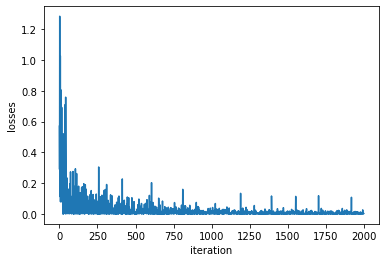

In [12]:
# plotting
plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

- **Vectorization:**

In [13]:
# forward
def predict(x, theta):
    return x.dot(theta)

# compute gradient
def gradient(z, y, x):
    dtheta = 2*x*(z-y)
    
    return dtheta

# update weights
def update_weight(theta, n, dtheta):
    dtheta_new = theta - n*dtheta
    
    return dtheta_new

In [14]:
# init weights
n = 0.01
theta = np.array([-0.34, -0.34, -0.34, 0.04]) #[w, b]

# how long
epoch_max = 10

# to plot
losses = [] 

# train
for epoch in range(epoch_max):
    # shuffle data
    normalized_df = shuffle(normalized_df)
    
    # convert to numpy array
    X = normalized_df.iloc[:, :-1].to_numpy()
    Y = normalized_df.iloc[:, -1].to_numpy()
    
    # concatenate ones-column [X, 1]
    X_ = np.c_[X, np.ones((data_size, 1))]
    
    for i in range(data_size):
        # get a sample
        x = X_[i]
        y = Y[i:i+1]
        print('sample: ', x, y)
        
        # predict z
        z = predict(x, theta)
        print('z: ', z)

        # compute loss
        loss = (z-y)*(z-y)
        losses.append(loss[0])
        print('Loss: ', loss[0])
        
        # compute gradient
        dtheta = gradient(z, y, x)
        print('dtheta: ', dtheta)

        # update weights
        theta = update_weight(theta, n, dtheta)
        print('theta_new: ', theta)
        print('\n\n')

sample:  [0.92323301 0.58266129 0.52242744 1.        ] [0.75590551]
z:  -0.6496293907096276
Loss:  1.9755283622037363
dtheta:  [-2.59527243 -1.63790156 -1.46858    -2.81106981]
theta_new:  [-0.31404728 -0.32362098 -0.3253142   0.0681107 ]



sample:  [0.67027393 0.99596774 0.52506596 1.        ] [0.87007874]
z:  -0.6355144772658892
Loss:  2.2668109363512534
dtheta:  [-2.01831975 -2.99904455 -1.58107151 -3.01118643]
theta_new:  [-0.29386408 -0.29363054 -0.30950348  0.09822256]



sample:  [0.32127156 0.02822581 0.06244503 1.        ] [0.40551181]
z:  -0.023802521537103077
Loss:  0.18431079614206092
dtheta:  [-0.27585297 -0.02423549 -0.05361709 -0.85862867]
theta_new:  [-0.29110555 -0.29338818 -0.30896731  0.10680885]



sample:  [0.58099425 0.36491935 0.26737027 1.        ] [0.58267717]
z:  -0.2519935028304027
Loss:  0.6966751243279492
dtheta:  [-0.96987772 -0.60917496 -0.44633225 -1.66934134]
theta_new:  [-0.28140677 -0.28729643 -0.30450399  0.12350226]



sample:  [0.22894826 0.897177

dtheta:  [-1.15361175 -1.38967632 -0.54436659 -1.40669276]
theta_new:  [-0.08246885 -0.06107907 -0.20712071  0.48114849]



sample:  [0.73655732 0.10887097 0.23834653 1.        ] [0.61417323]
z:  0.364389214657461
Loss:  0.062392053494584404
dtheta:  [-0.36796049 -0.05438845 -0.1190703  -0.49956803]
theta_new:  [-0.07878925 -0.06053519 -0.20593001  0.48614417]



sample:  [0.58978695 0.45362903 0.27440633 1.        ] [0.57086614]
z:  0.35570628605199633
Loss:  0.04629376349636203
dtheta:  [-0.25379695 -0.19520551 -0.11808245 -0.43031971]
theta_new:  [-0.07625128 -0.05858313 -0.20474918  0.49044737]



sample:  [0.3449442  0.59677419 0.07124011 1.        ] [0.48818898]
z:  0.41459767861625985
Loss:  0.005415679106250151
dtheta:  [-0.05076978 -0.08783477 -0.0104853  -0.1471826 ]
theta_new:  [-0.07574358 -0.05770478 -0.20464433  0.49191919]



sample:  [0.16672303 0.23387097 0.15919085 1.        ] [0.26771654]
z:  0.43321801653816755
Loss:  0.027390740247980667
dtheta:  [0.05518582 0.0774

sample:  [0.14338857 0.53830645 0.3060686  1.        ] [0.33464567]
z:  0.4944042692080058
Loss:  0.025522810247333733
dtheta:  [0.04581511 0.17199817 0.09779418 0.3195172 ]
theta_new:  [-0.00172488 -0.01455953 -0.1761173   0.551907  ]



sample:  [0.63476496 0.36491935 0.22251539 1.        ] [0.72047244]
z:  0.5063102441140462
Loss:  0.04586544655140957
dtheta:  [-0.27188532 -0.15630386 -0.09530877 -0.42832439]
theta_new:  [ 0.00099397 -0.01299649 -0.17516422  0.55619025]



sample:  [0.5732161  0.15725806 0.30694811 1.        ] [0.59448819]
z:  0.5009498795218851
Loss:  0.008749415335604482
dtheta:  [-0.10723533 -0.02941931 -0.05742281 -0.18707662]
theta_new:  [ 0.00206633 -0.0127023  -0.17458999  0.55806101]



sample:  [0.7612445  0.16532258 0.4942832  1.        ] [0.66141732]
z:  0.4712371170954994
Loss:  0.03616851065498397
dtheta:  [-0.28954727 -0.06288216 -0.18800576 -0.38036041]
theta_new:  [ 0.0049618  -0.01207347 -0.17270993  0.56186462]



sample:  [0.45485289 0.84072581 0.

sample:  [0.76868448 0.76008065 0.27880387 1.        ] [0.78346457]
z:  0.5837640257421953
Loss:  0.03988030615035611
dtheta:  [-0.30701341 -0.30357703 -0.11135457 -0.39940108]
theta_new:  [ 0.05312447  0.01466821 -0.16020584  0.58541692]



sample:  [0.05478526 0.88104839 0.78364116 1.        ] [0.27952756]
z:  0.4757068678649463
Loss:  0.03848632120510194
dtheta:  [0.02149547 0.34568693 0.30746836 0.39235862]
theta_new:  [ 0.05290952  0.01121134 -0.16328053  0.58149334]



sample:  [0.43523842 0.11491935 0.27264732 1.        ] [0.37007874]
z:  0.561291993728451
Loss:  0.036562508341196315
dtheta:  [0.16644671 0.04394821 0.10426756 0.38242651]
theta_new:  [ 0.05124505  0.01077186 -0.1643232   0.57766907]



sample:  [0.03719986 0.74395161 0.39489886 1.        ] [0.22440945]
z:  0.5226980753251047
Loss:  0.08897610470295951
dtheta:  [0.02219259 0.44382461 0.23558768 0.59657725]
theta_new:  [ 0.05102313  0.00633361 -0.16667908  0.5717033 ]



sample:  [0.36895502 0.96370968 0.44942832 1

sample:  [0.93337842 0.04637097 0.20580475 1.        ] [0.5984252]
z:  0.6208827998502693
Loss:  0.0005043439325000187
dtheta:  [0.04192288 0.00208276 0.00924376 0.04491521]
theta_new:  [ 0.10477694  0.02393996 -0.14939476  0.55186186]



sample:  [0.49577274 0.48185484 0.16534741 1.        ] [0.51181102]
z:  0.5906409568868071
Loss:  0.0062141583785264905
dtheta:  [0.07816346 0.07596917 0.02606865 0.15765987]
theta_new:  [ 0.1039953   0.02318027 -0.14965545  0.55028526]



sample:  [0.4041258  0.39516129 0.09938434 1.        ] [0.45669291]
z:  0.5865989809212653
Loss:  0.016875586382521904
dtheta:  [0.10499679 0.1026677  0.02582126 0.25981214]
theta_new:  [ 0.10294533  0.02215359 -0.14991366  0.54768714]



sample:  [0.02603991 0.5483871  0.01583113 1.        ] [0.16141732]
z:  0.5601432653918048
Loss:  0.15898237726809497
dtheta:  [0.02076557 0.43731232 0.01262457 0.79745189]
theta_new:  [ 0.10273768  0.01778047 -0.15003991  0.53971262]



sample:  [0.50388908 0.71774194 0.05013193 1

sample:  [0.36083869 0.28225806 0.09322779 1.        ] [0.38976378]
z:  0.5671093884471828
Loss:  0.03145146500307213
dtheta:  [0.12798631 0.10011446 0.03306708 0.35469122]
theta_new:  [ 0.14402283  0.03687862 -0.14631732  0.51404979]



sample:  [0.72370646 0.48387097 0.03254178 1.        ] [0.62204724]
z:  0.6313631074233831
Loss:  8.67853095626486e-05
dtheta:  [0.0134839  0.00901535 0.00060631 0.01863173]
theta_new:  [ 0.14388799  0.03678847 -0.14632338  0.51386347]



sample:  [0.93405479 0.9858871  0.3649956  1.        ] [1.]
z:  0.6311246224409328
Loss:  0.13606904416934437
dtheta:  [-0.68909962 -0.72733895 -0.26927578 -0.73775076]
theta_new:  [ 0.15077899  0.04406186 -0.14363062  0.52124098]



sample:  [0.73621914 0.55846774 0.46701847 1.        ] [0.64566929]
z:  0.5897763264121478
Loss:  0.0031240235282676714
dtheta:  [-0.08229894 -0.06242884 -0.05220609 -0.11178593]
theta_new:  [ 0.15160198  0.04468615 -0.14310856  0.52235884]



sample:  [0.74332093 0.66935484 0.33069481 1.

dtheta:  [0.01825543 0.36508619 0.19379233 0.49073916]
theta_new:  [ 0.16963593  0.04338189 -0.14366193  0.47953097]



sample:  [0.9773419  0.85282258 0.44766931 1.        ] [0.93700787]
z:  0.6180072888344372
Loss:  0.10176137334601866
dtheta:  [-0.62354528 -0.5441018  -0.28561354 -0.63800117]
theta_new:  [ 0.17587138  0.04882291 -0.1408058   0.48591098]



sample:  [0.89584038 0.40322581 0.         1.        ] [0.62204724]
z:  0.663150322955445
Loss:  0.0016894630918500308
dtheta:  [0.0736436  0.03314764 0.         0.08220616]
theta_new:  [ 0.17513495  0.04849143 -0.1408058   0.48508892]



sample:  [0.77578627 0.76209677 0.60598065 1.        ] [0.80708661]
z:  0.5725857805565036
Loss:  0.05499064096693885
dtheta:  [-0.36384505 -0.35742466 -0.28420594 -0.46900167]
theta_new:  [ 0.1787734   0.05206568 -0.13796374  0.48977893]



sample:  [0.80892797 0.83669355 0.16007036 1.        ] [0.8503937]
z:  0.6558728488907576
Loss:  0.037838361822596076
dtheta:  [-0.31470671 -0.32550868 -0.06

sample:  [0.69699019 0.10483871 0.16798593 1.        ] [0.61417323]
z:  0.5597857134165765
Loss:  0.0029580017802479474
dtheta:  [-0.07581513 -0.01140383 -0.01827267 -0.10877503]
theta_new:  [ 0.20702997  0.04741376 -0.13371577  0.43463825]



sample:  [0.06121069 0.4375     0.44063325 1.        ] [0.21259843]
z:  0.40913460329611845
Loss:  0.038626469301867195
dtheta:  [0.02406023 0.17196916 0.17320075 0.39307236]
theta_new:  [ 0.20678937  0.04569407 -0.13544777  0.43070752]



sample:  [0.25566452 0.55443548 0.13808267 1.        ] [0.40944882]
z:  0.4902076536684681
Loss:  0.006521989393542258
dtheta:  [0.04129434 0.08955113 0.02230279 0.16151767]
theta_new:  [ 0.20637643  0.04479856 -0.1356708   0.42909235]



sample:  [0.50422726 0.02620968 0.21108179 1.        ] [0.33464567]
z:  0.5056894867762327
Loss:  0.02925598749980577
dtheta:  [0.17248991 0.00896601 0.07220847 0.34208763]
theta_new:  [ 0.20465153  0.0447089  -0.13639289  0.42567147]



sample:  [0.25025364 0.99596774 0.39929


sample:  [0.69090294 0.90927419 0.16974494 1.        ] [0.82677165]
z:  0.6794276890581799
Loss:  0.021710243870194462
dtheta:  [-0.20360076 -0.26795213 -0.05002179 -0.29468793]
theta_new:  [ 0.25533607  0.08876061 -0.1179985   0.44921206]



sample:  [0.76597903 0.31854839 0.43623571 1.        ] [0.71653543]
z:  0.6215935206892544
Loss:  0.009013966726677645
dtheta:  [-0.14544703 -0.06048719 -0.0828341  -0.18988382]
theta_new:  [ 0.25679054  0.08936548 -0.11717016  0.45111089]



sample:  [0.08217788 0.22177419 0.2585752  1.        ] [0.22047244]
z:  0.461735058685537
Loss:  0.05820765071907347
dtheta:  [0.0396529  0.10701164 0.12476906 0.48252524]
theta_new:  [ 0.25639401  0.08829537 -0.11841785  0.44628564]



sample:  [0.65099763 0.37096774 0.57519789 1.        ] [0.73228346]
z:  0.5778385711433014
Loss:  0.023853225104635705
dtheta:  [-0.20108652 -0.11458815 -0.17767275 -0.30888979]
theta_new:  [ 0.25840487  0.08944125 -0.11664112  0.44937454]



sample:  [0.4041258  0.39516129 0




sample:  [0.5539398  0.42137097 0.41424802 1.        ] [0.62598425]
z:  0.5426661642999562
Loss:  0.00694190373274381
dtheta:  [-0.09230641 -0.07021565 -0.06902871 -0.16663618]
theta_new:  [ 0.2857928   0.08480888 -0.1167665   0.39974795]



sample:  [0.29252621 0.23790323 0.22515391 1.        ] [0.35433071]
z:  0.47723570487317535
Loss:  0.015105638093812246
dtheta:  [0.07190587 0.05847899 0.05534508 0.24580999]
theta_new:  [ 0.28507374  0.08422409 -0.11731995  0.39728985]



sample:  [0.02705445 0.9858871  0.65699208 1.        ] [0.22047244]
z:  0.4109595305703137
Loss:  0.036285331313967294
dtheta:  [0.01030705 0.37559753 0.25029702 0.38097418]
theta_new:  [ 0.28497067  0.08046812 -0.11982292  0.39348011]



sample:  [0.25600271 0.01612903 0.12752858 1.        ] [0.30708661]
z:  0.4524503939910353
Loss:  0.021130628482919845
dtheta:  [0.07442704 0.00468915 0.03707607 0.29072756]
theta_new:  [ 0.2842264   0.08042123 -0.12019368  0.39057283]



sample:  [0.19918837 0.24193548 0.376

sample:  [0.74264457 0.98790323 0.02550572 1.        ] [0.90944882]
z:  0.6788331321540436
Loss:  0.053183594972219535
dtheta:  [-0.34253098 -0.45565196 -0.01176404 -0.46123137]
theta_new:  [ 0.31566319  0.09373707 -0.11951154  0.36651316]



sample:  [0.0906324  0.03225806 0.17941953 1.        ] [0.20866142]
z:  0.37670354247438836
Loss:  0.028238155825450428
dtheta:  [0.03046012 0.01084143 0.06030008 0.33608425]
theta_new:  [ 0.31535859  0.09362865 -0.12011454  0.36315232]



sample:  [0.67027393 0.99596774 0.52506596 1.        ] [0.87007874]
z:  0.6047120136553846
Loss:  0.07041949953443806
dtheta:  [-0.3557368  -0.5285934  -0.27867007 -0.53073345]
theta_new:  [ 0.31891596  0.09891459 -0.11732784  0.36845965]



sample:  [0.63476496 0.36491935 0.22251539 1.        ] [0.72047244]
z:  0.5808849220101229
Loss:  0.019484675442361692
dtheta:  [-0.17721053 -0.10187637 -0.06212074 -0.27917504]
theta_new:  [ 0.32068806  0.09993335 -0.11670663  0.3712514 ]



sample:  [0.9773419  0.85282258 

sample:  [0.96482922 0.28024194 0.02990325 1.        ] [0.75984252]
z:  0.6998280180788461
Loss:  0.0036017404030397734
dtheta:  [-0.11580749 -0.03363716 -0.00358926 -0.120029  ]
theta_new:  [ 0.35072677  0.10513129 -0.10991101  0.33767406]



sample:  [0.08826513 0.66532258 0.16710642 1.        ] [0.28346457]
z:  0.42021039086098777
Loss:  0.018699420362801575
dtheta:  [0.02413978 0.18196017 0.04570221 0.27349165]
theta_new:  [ 0.35048537  0.10331169 -0.11036804  0.33493914]



sample:  [0.78254988 0.1733871  0.07387863 1.        ] [0.66141732]
z:  0.6189705018699878
Loss:  0.0018017326100057125
dtheta:  [-0.06643351 -0.01471946 -0.00627183 -0.08489364]
theta_new:  [ 0.3511497   0.10345888 -0.11030532  0.33578808]



sample:  [0.81501522 0.76612903 0.20140721 1.        ] [0.79527559]
z:  0.6790270006338335
Loss:  0.013513734657771663
dtheta:  [-0.18948874 -0.17812284 -0.04682661 -0.23249718]
theta_new:  [ 0.35304459  0.10524011 -0.10983705  0.33811305]



sample:  [0.80892797 0.836693

dtheta:  [-0.00830615 -0.03305708 -0.01325301 -0.03319091]
theta_new:  [ 0.38058642  0.1143994  -0.10314753  0.33189261]



sample:  [0.68785932 0.66330645 0.40193492 1.        ] [0.68503937]
z:  0.6281057946223765
Loss:  0.003241432014245457
dtheta:  [-0.07832458 -0.07552882 -0.04576718 -0.11386715]
theta_new:  [ 0.38136966  0.11515469 -0.10268986  0.33303128]



sample:  [0.22387555 0.2358871  0.32102023 1.        ] [0.31889764]
z:  0.4126086109922752
Loss:  0.00878174649752878
dtheta:  [0.04195919 0.04421042 0.06016624 0.18742195]
theta_new:  [ 0.38095007  0.11471259 -0.10329152  0.33115706]



sample:  [0.69732837 0.16935484 0.22955145 1.        ] [0.64173228]
z:  0.5925207711817688
Loss:  0.002421772941159986
dtheta:  [-0.06863317 -0.01666842 -0.02259315 -0.09842302]
theta_new:  [ 0.3816364   0.11487927 -0.10306559  0.33214129]



sample:  [0.73080825 0.88508065 0.23658751 1.        ] [0.81496063]
z:  0.6883377165113048
Loss:  0.016033362200424967
dtheta:  [-0.18507414 -0.22414298

theta_new:  [ 0.38680911  0.11633974 -0.10242503  0.31523506]



sample:  [0.58978695 0.45362903 0.27440633 1.        ] [0.57086614]
z:  0.5680390332294838
Loss:  7.99254248660275e-06
dtheta:  [-0.00333478 -0.00256492 -0.00155155 -0.00565422]
theta_new:  [ 0.38684246  0.11636539 -0.10240951  0.31529161]



sample:  [0.45485289 0.84072581 0.40105541 1.        ] [0.61417323]
z:  0.5480075114963856
Loss:  0.004377902086283784
dtheta:  [-0.06019134 -0.11125445 -0.05307224 -0.13233143]
theta_new:  [ 0.38744437  0.11747793 -0.10187879  0.31661492]



sample:  [0.32735881 0.15322581 0.06068602 1.        ] [0.47637795]
z:  0.4552662811904292
Loss:  0.0004457026762885395
dtheta:  [-0.01382218 -0.00646971 -0.00256237 -0.04222334]
theta_new:  [ 0.38758259  0.11754263 -0.10185317  0.31703715]



sample:  [0.12614136 0.8125     0.10202287 1.        ] [0.36614173]
z:  0.45103938416214423
Loss:  0.007207611294513468
dtheta:  [0.02141821 0.13795868 0.017323   0.1697953 ]
theta_new:  [ 0.38736841  0.11

z:  0.735224925798162
Loss:  0.030353964926737545
dtheta:  [-0.25877286 -0.34423269 -0.00888741 -0.34844779]
theta_new:  [ 0.41469133  0.12827025 -0.10076031  0.31191723]



sample:  [0.25160636 0.70564516 0.46086192 1.        ] [0.43307087]
z:  0.4603328906477099
Loss:  0.0007432179801645226
dtheta:  [0.0137186  0.03847463 0.02512806 0.05452405]
theta_new:  [ 0.41455414  0.1278855  -0.10101159  0.31137199]



sample:  [0.50388908 0.71774194 0.05013193 1.        ] [0.61811024]
z:  0.606986172213694
Loss:  0.00012374480002690642
dtheta:  [-0.01121059 -0.01596841 -0.00111534 -0.02224813]
theta_new:  [ 0.41466625  0.12804519 -0.10100044  0.31159447]



sample:  [0.65843761 0.96169355 0.46262093 1.        ] [0.81889764]
z:  0.6610416305026219
Loss:  0.02491851903837834
dtheta:  [-0.20787666 -0.30361821 -0.14605499 -0.31571201]
theta_new:  [ 0.41674501  0.13108137 -0.09953989  0.31475159]



sample:  [0.19918837 0.24193548 0.3764292  1.        ] [0.31889764]
z:  0.3920058587442142
Loss:  0.

dtheta:  [-0.08055378 -0.12143258 -0.00416218 -0.1434061 ]
theta_new:  [ 0.42621875  0.13655084 -0.0975955   0.28766452]



sample:  [0.81501522 0.76612903 0.20140721 1.        ] [0.79527559]
z:  0.7199984107746944
Loss:  0.0056666537951015035
dtheta:  [-0.12270409 -0.11534407 -0.03032273 -0.15055436]
theta_new:  [ 0.4274458   0.13770428 -0.09729227  0.28917006]



sample:  [0.59621238 0.6733871  0.33773087 1.        ] [0.61023622]
z:  0.6038882144192061
Loss:  4.029718085190736e-05
dtheta:  [-0.00756952 -0.00854933 -0.00428784 -0.01269601]
theta_new:  [ 0.42752149  0.13778977 -0.09724939  0.28929702]



sample:  [0.4687183  0.29233871 0.08707124 1.        ] [0.46456693]
z:  0.5214978228871128
Loss:  0.0032411266635443458
dtheta:  [0.0533691  0.03328621 0.00991409 0.11386179]
theta_new:  [ 0.4269878   0.13745691 -0.09734853  0.2881584 ]



sample:  [0.72370646 0.48387097 0.03254178 1.        ] [0.62204724]
z:  0.6605157436627641
Loss:  0.0014798254590344443
dtheta:  [0.0556798  0.03722

sample:  [0.5539398  0.42137097 0.41424802 1.        ] [0.62598425]
z:  0.5551551262208254
Loss:  0.005016765054180456
dtheta:  [-0.07847014 -0.05969067 -0.05868165 -0.14165825]
theta_new:  [ 0.4437664   0.1438343  -0.08900206  0.28794245]



sample:  [0.36083869 0.28225806 0.09322779 1.        ] [0.38976378]
z:  0.48037145844020523
Loss:  0.008209751477937182
dtheta:  [0.06538951 0.0511495  0.01689431 0.18121536]
theta_new:  [ 0.44311251  0.1433228  -0.089171    0.28613029]



sample:  [0.01149814 0.23387097 0.0474934  1.        ] [0.06299213]
z:  0.32050927036310256
Loss:  0.06631507964903778
dtheta:  [0.00592194 0.12045157 0.02446073 0.51503429]
theta_new:  [ 0.44305329  0.14211829 -0.08941561  0.28097995]



sample:  [0.63476496 0.36491935 0.22251539 1.        ] [0.72047244]
z:  0.5941800205317255
Loss:  0.015949775453813434
dtheta:  [-0.16033201 -0.0921731  -0.05620401 -0.25258484]
theta_new:  [ 0.44465661  0.14304002 -0.08885357  0.2835058 ]



sample:  [0.74332093 0.66935484 0.3

dtheta:  [0.04064215 0.02663407 0.00629348 0.04586979]
theta_new:  [ 0.45665894  0.15117624 -0.08542652  0.27356236]



sample:  [0.46398377 0.93548387 0.51627089 1.        ] [0.52755906]
z:  0.582764401604524
Loss:  0.003047630280684993
dtheta:  [0.05122877 0.10328742 0.05700183 0.11041069]
theta_new:  [ 0.45614665  0.15014337 -0.08599654  0.27245825]



sample:  [0.04193439 0.00806452 0.22251539 1.        ] [0.14566929]
z:  0.273661763516533
Loss:  0.016382072934223387
dtheta:  [0.01073457 0.00206439 0.05696059 0.25598494]
theta_new:  [ 0.4560393   0.15012272 -0.08656614  0.2698984 ]



sample:  [0.77375719 0.65120968 0.64995602 1.        ] [0.71259843]
z:  0.6642592736910738
Loss:  0.0023366735682984145
dtheta:  [-0.07480553 -0.06295785 -0.06283665 -0.0966783 ]
theta_new:  [ 0.45678736  0.1507523  -0.08593778  0.27086518]



sample:  [0.31518431 0.87701613 0.44151275 1.        ] [0.53937008]
z:  0.5091069669517853
Loss:  0.0009158559351155164
dtheta:  [-0.01907692 -0.05308247 -0.026

dtheta:  [0.01088904 0.00349017 0.03319129 0.11540824]
theta_new:  [ 0.4744816   0.15444427 -0.08038385  0.25453185]



sample:  [0.63307406 0.34677419 0.15479332 1.        ] [0.71259843]
z:  0.5960282418940428
Loss:  0.013588607635250152
dtheta:  [-0.14759512 -0.08084706 -0.03608857 -0.23314037]
theta_new:  [ 0.47595755  0.15525274 -0.08002296  0.25686325]



sample:  [0.80047345 0.10282258 0.20404573 1.        ] [0.62598425]
z:  0.6374897752239551
Loss:  0.00013237706538172787
dtheta:  [0.01841973 0.00236606 0.00469531 0.02301105]
theta_new:  [ 0.47577335  0.15522908 -0.08006992  0.25663314]



sample:  [0.13121407 0.82862903 0.04837291 1.        ] [0.36220472]
z:  0.4438154013540388
Loss:  0.006660302591354217
dtheta:  [0.02141694 0.13524995 0.00789549 0.16322135]
theta_new:  [ 0.47555918  0.15387658 -0.08014887  0.25500093]



sample:  [0.2316537  0.41330645 0.15831135 1.        ] [0.38188976]
z:  0.41607567837646153
Loss:  0.0011686767568288604
dtheta:  [0.01583859 0.02825852 0.01

dtheta:  [-0.20710511 -0.20315453 -0.0095098  -0.23005627]
theta_new:  [ 0.4881912   0.16103545 -0.07776423  0.24946484]



sample:  [0.69732837 0.16935484 0.22955145 1.        ] [0.64173228]
z:  0.5993156559354497
Loss:  0.0017991702909438661
dtheta:  [-0.05915664 -0.01436692 -0.0194736  -0.08483326]
theta_new:  [ 0.48878277  0.16117912 -0.0775695   0.25031317]



sample:  [0.50422726 0.02620968 0.21108179 1.        ] [0.33464567]
z:  0.48462171062595016
Loss:  0.022492812974401116
dtheta:  [0.15124402 0.00786165 0.06331442 0.29995208]
theta_new:  [ 0.48727033  0.1611005  -0.07820264  0.24731365]



sample:  [0.49577274 0.48185484 0.16534741 1.        ] [0.51181102]
z:  0.5535854518071904
Loss:  0.0017451028501956874
dtheta:  [0.04142125 0.04025842 0.01381459 0.08354886]
theta_new:  [ 0.48685611  0.16069792 -0.07834079  0.24647816]



sample:  [0.2316537  0.41330645 0.15831135 1.        ] [0.38188976]
z:  0.41327543689343893
Loss:  0.0009850604768132964
dtheta:  [0.01454121 0.0259438 

dtheta:  [-0.0216286  -0.02457806 -0.01836313 -0.04548775]
theta_new:  [ 0.50030563  0.16044559 -0.07375974  0.23046257]



sample:  [0.08217788 0.22177419 0.2585752  1.        ] [0.22047244]
z:  0.2880868863869327
Loss:  0.004571713232436065
dtheta:  [0.01111282 0.02999028 0.03496684 0.13522889]
theta_new:  [ 0.50019451  0.16014569 -0.07410941  0.22911029]



sample:  [0.04227257 0.32056452 0.43359719 1.        ] [0.15748031]
z:  0.26945819147274847
Loss:  0.01253904482816327
dtheta:  [0.00946719 0.07179227 0.09710658 0.22395575]
theta_new:  [ 0.50009983  0.15942777 -0.07508047  0.22687073]



sample:  [0.33716605 0.19354839 0.02902375 1.        ] [0.35826772]
z:  0.4241652831751031
Loss:  0.004342489289029749
dtheta:  [0.04443684 0.02550874 0.00382519 0.13179513]
theta_new:  [ 0.49965547  0.15917268 -0.07511872  0.22555278]



sample:  [0.25160636 0.70564516 0.46086192 1.        ] [0.43307087]
z:  0.4289693423972298
Loss:  1.6822497026717898e-05
dtheta:  [-0.00206394 -0.00578844 -0.0

sample:  [0.1481231  0.79233871 0.39401935 1.        ] [0.34645669]
z:  0.415336019749721
Loss:  0.004744361665426677
dtheta:  [0.02040524 0.10915151 0.05427958 0.13775865]
theta_new:  [ 0.52076398  0.17311948 -0.06867323  0.22560163]



sample:  [0.         0.7983871  0.07387863 1.        ] [0.]
z:  0.3587445046161646
Loss:  0.12869761959229734
dtheta:  [0.         0.57283397 0.0530071  0.71748901]
theta_new:  [ 0.52076398  0.16739114 -0.0692033   0.21842674]



sample:  [0.46398377 0.93548387 0.51627089 1.        ] [0.52755906]
z:  0.5809168331733989
Loss:  0.0028470524789974408
dtheta:  [0.04951429 0.09983068 0.05509413 0.10671556]
theta_new:  [ 0.52026884  0.16639283 -0.06975424  0.21735959]



sample:  [0.02231992 0.56653226 0.36147757 1.        ] [0.15354331]
z:  0.29802425556622164
Loss:  0.020874744473566985
dtheta:  [0.00644961 0.16370624 0.10445325 0.2889619 ]
theta_new:  [ 0.52020434  0.16475577 -0.07079878  0.21446997]



sample:  [0.25228272 0.40927419 0.28320141 1.       

dtheta:  [-0.0830833  -0.1180479  -0.00164226 -0.13337531]
theta_new:  [ 0.52617099  0.17142146 -0.06766397  0.20952153]



sample:  [0.61515049 0.93145161 0.51363237 1.        ] [0.77165354]
z:  0.6581122638678976
Loss:  0.012891622136688007
dtheta:  [-0.13968995 -0.21151642 -0.11663695 -0.22708256]
theta_new:  [ 0.52756789  0.17353663 -0.0664976   0.21179235]



sample:  [0.46838011 0.28830645 0.22251539 1.        ] [0.41732283]
z:  0.49412965100607764
Loss:  0.0058992870394214865
dtheta:  [0.07194957 0.0442878  0.0341814  0.15361363]
theta_new:  [ 0.52684839  0.17309375 -0.06683942  0.21025622]



sample:  [0.58099425 0.36491935 0.26737027 1.        ] [0.58267717]
z:  0.5616464912364962
Loss:  0.0004422892538505512
dtheta:  [-0.0244374  -0.015349   -0.01124595 -0.04206135]
theta_new:  [ 0.52709277  0.17324724 -0.06672696  0.21067683]



sample:  [0.37943862 0.35080645 0.33685136 1.        ] [0.40551181]
z:  0.44897536577213915
Loss:  0.0018890805913773382
dtheta:  [0.0329835  0.0304

sample:  [0.40683125 0.16935484 0.42568162 1.        ] [0.39370079]
z:  0.4232897104237116
Loss:  0.000875504365609936
dtheta:  [0.0240754  0.01002205 0.02519092 0.05917785]
theta_new:  [ 0.53791233  0.18067257 -0.06283773  0.19978733]



sample:  [0.54988164 0.63709677 0.46262093 1.        ] [0.6023622]
z:  0.5816113018036513
Loss:  0.0004305999720267315
dtheta:  [-0.02282108 -0.02644067 -0.0191996  -0.04150181]
theta_new:  [ 0.53814055  0.18093697 -0.06264574  0.20020235]



sample:  [0.95671288 0.84677419 0.57959543 1.        ] [0.94094488]
z:  0.8319519167515512
Loss:  0.011879466449619616
dtheta:  [-0.20854995 -0.18458486 -0.12634365 -0.21798593]
theta_new:  [ 0.54022604  0.18278282 -0.0613823   0.20238221]



sample:  [0.12614136 0.8125     0.10202287 1.        ] [0.36614173]
z:  0.4127756975784999
Loss:  0.0021747267191385544
dtheta:  [0.01176494 0.07578019 0.00951546 0.09326793]
theta_new:  [ 0.5401084   0.18202502 -0.06147745  0.20144953]



sample:  [0.25600271 0.53830645 0.1

sample:  [0.94690565 0.28024194 0.32277924 1.        ] [0.57086614]
z:  0.7468313649891914
Loss:  0.030963759795853436
dtheta:  [0.33324493 0.09862567 0.11359584 0.35193045]
theta_new:  [ 0.54099075  0.17919744 -0.06116082  0.1967691 ]



sample:  [0.04227257 0.32056452 0.43359719 1.        ] [0.15748031]
z:  0.2505633507814009
Loss:  0.008664451557610935
dtheta:  [0.00786972 0.05967824 0.08072108 0.18616607]
theta_new:  [ 0.54091205  0.17860066 -0.06196804  0.19490744]



sample:  [0.44301657 0.37096774 0.30167106 1.        ] [0.44488189]
z:  0.48210156276709604
Loss:  0.0013853040584738045
dtheta:  [0.03297786 0.0276146  0.0224562  0.07443935]
theta_new:  [ 0.54058228  0.17832451 -0.0621926   0.19416305]



sample:  [0.74332093 0.66935484 0.33069481 1.        ] [0.72834646]
z:  0.6947847746239576
Loss:  0.0011263865032976707
dtheta:  [-0.0498942  -0.04492935 -0.02219735 -0.06712336]
theta_new:  [ 0.54108122  0.17877381 -0.06197062  0.19483428]



sample:  [0.58978695 0.45362903 0.274

z:  0.30085288322130993
Loss:  0.0194422755003431
dtheta:  [0.00726178 0.15292932 0.00441485 0.27887112]
theta_new:  [ 0.54895256  0.17556359 -0.06014559  0.18760363]



sample:  [0.98816368 0.57056452 0.37730871 1.        ] [0.77952756]
z:  0.8075355126681631
Loss:  0.0007844454655904855
dtheta:  [0.05535288 0.03196069 0.02113529 0.05601591]
theta_new:  [ 0.54839903  0.17524398 -0.06035694  0.18704347]



sample:  [0.20831924 0.25403226 0.15831135 1.        ] [0.31889764]
z:  0.3362479789961376
Loss:  0.00030103433978633084
dtheta:  [0.00722882 0.00881509 0.00549351 0.03470068]
theta_new:  [ 0.54832674  0.17515583 -0.06041188  0.18669647]



sample:  [0.12242137 0.77822581 0.57431838 1.        ] [0.36220472]
z:  0.3554385132918272
Loss:  4.578161288822766e-05
dtheta:  [-0.00165666 -0.01053128 -0.00777192 -0.01353242]
theta_new:  [ 0.54834331  0.17526114 -0.06033416  0.18683179]



sample:  [0.50997633 0.83266129 0.51187335 1.        ] [0.58661417]
z:  0.5815236184245756
Loss:  2.59137

sample:  [0.80960433 0.14717742 0.07387863 1.        ] [0.65354331]
z:  0.6719294994692948
Loss:  0.00033805207033294534
dtheta:  [0.02977108 0.00541206 0.00271669 0.03677238]
theta_new:  [ 0.55763475  0.18009745 -0.05711176  0.19756033]



sample:  [0.96482922 0.28024194 0.02990325 1.        ] [0.75984252]
z:  0.7843456596102556
Loss:  0.0006004038661947263
dtheta:  [0.04728269 0.01373361 0.00146545 0.04900628]
theta_new:  [ 0.55716192  0.17996012 -0.05712642  0.19707027]



sample:  [0.66587758 0.07056452 0.04925242 1.        ] [0.59448819]
z:  0.5779570819908617
Loss:  0.0002732774981665857
dtheta:  [-0.02201539 -0.00233302 -0.00162839 -0.03306221]
theta_new:  [ 0.55738208  0.17998345 -0.05711013  0.19740089]



sample:  [0.89584038 0.40322581 0.         1.        ] [0.62204724]
z:  0.7693002291576583
Loss:  0.021683441610014193
dtheta:  [0.26383034 0.11875241 0.         0.29450597]
theta_new:  [ 0.55474377  0.17879592 -0.05711013  0.19445583]



sample:  [0.01149814 0.23387097 0.04

sample:  [0.72945553 0.84072581 0.34564644 1.        ] [0.82677165]
z:  0.736255829249095
Loss:  0.00819311444766068
dtheta:  [-0.13205454 -0.15219798 -0.06257294 -0.18103165]
theta_new:  [ 0.56541383  0.18781451 -0.05189391  0.18811747]



sample:  [0.46939466 0.04233871 0.23131047 1.        ] [0.34251969]
z:  0.4494679195730984
Loss:  0.011437924869881346
dtheta:  [0.10040186 0.0090561  0.04947649 0.21389647]
theta_new:  [ 0.56440982  0.18772395 -0.05238868  0.1859785 ]



sample:  [0.71017924 0.59475806 0.07915567 1.        ] [0.66141732]
z:  0.6943141058963485
Loss:  0.0010821983358087395
dtheta:  [0.04672522 0.03913125 0.00520793 0.06579357]
theta_new:  [ 0.56394256  0.18733263 -0.05244076  0.18532057]



sample:  [0.72607372 0.47580645 0.50395778 1.        ] [0.61023622]
z:  0.6574905927651034
Loss:  0.0022329757007735276
dtheta:  [0.06862032 0.04496787 0.04762842 0.09450874]
theta_new:  [ 0.56325636  0.18688296 -0.05291704  0.18437548]



sample:  [0.45485289 0.84072581 0.401055

sample:  [0.04193439 0.00806452 0.22251539 1.        ] [0.14566929]
z:  0.19936026122036107
Loss:  0.002882720246846036
dtheta:  [0.004503   0.00086598 0.02389413 0.10738194]
theta_new:  [ 0.56447691  0.19342937 -0.05045241  0.18422684]



sample:  [0.73080825 0.88508065 0.23658751 1.        ] [0.81496063]
z:  0.7560154061770543
Loss:  0.0034745394022544502
dtheta:  [-0.08615531 -0.10434255 -0.02789141 -0.11789045]
theta_new:  [ 0.56533846  0.19447279 -0.0501735   0.18540575]



sample:  [0.83767332 0.60887097 0.1759015  1.        ] [0.73228346]
z:  0.768557938436494
Loss:  0.0013158374545137502
dtheta:  [0.06077232 0.04417295 0.01276147 0.07254895]
theta_new:  [ 0.56473074  0.19403106 -0.05030111  0.18468026]



sample:  [0.31619885 0.09879032 0.06860158 1.        ] [0.48818898]
z:  0.3789651241868818
Loss:  0.011929849887456925
dtheta:  [-0.06907291 -0.02158052 -0.01498586 -0.2184477 ]
theta_new:  [ 0.56542147  0.19424687 -0.05015125  0.18686474]



sample:  [0.59181603 0.31048387 0.

Loss:  0.00012267162359897097
dtheta:  [0.01779157 0.01531844 0.00097412 0.02215144]
theta_new:  [ 0.57370677  0.19102471 -0.04964546  0.17186771]



sample:  [0.08217788 0.22177419 0.2585752  1.        ] [0.22047244]
z:  0.24854098223186313
Loss:  0.0007878430099789709
dtheta:  [0.00461323 0.01244976 0.01451566 0.05613708]
theta_new:  [ 0.57366064  0.19090021 -0.04979062  0.17130634]



sample:  [0.18769023 0.11491935 0.2585752  1.        ] [0.27952756]
z:  0.28804034298403414
Loss:  7.246749022041093e-05
dtheta:  [0.00319553 0.00195657 0.00440239 0.01702557]
theta_new:  [ 0.57362868  0.19088065 -0.04983464  0.17113608]



sample:  [0.0557998  0.08266129 0.27528584 1.        ] [0.16929134]
z:  0.20520411493246693
Loss:  0.0012897275051500167
dtheta:  [0.00400785 0.00593719 0.01977256 0.07182555]
theta_new:  [ 0.57358861  0.19082128 -0.05003237  0.17041783]



sample:  [0.67331755 0.0625     0.30167106 1.        ] [0.58267717]
z:  0.5534581137552465
Loss:  0.0008537529763499463
dtheta:

sample:  [0.68785932 0.66330645 0.40193492 1.        ] [0.68503937]
z:  0.6724759036088743
Loss:  0.00015784068973944313
dtheta:  [-0.01728379 -0.01666686 -0.01009939 -0.02512693]
theta_new:  [ 0.57646945  0.18920033 -0.04844105  0.17043968]



sample:  [0.83902604 0.54637097 0.19876869 1.        ] [0.68110236]
z:  0.7478575561867626
Loss:  0.004456255923579566
dtheta:  [0.11201869 0.0729462  0.02653768 0.13351039]
theta_new:  [ 0.57534926  0.18847087 -0.04870642  0.16910457]



sample:  [0.77375719 0.65120968 0.64995602 1.        ] [0.71259843]
z:  0.7053622157161947
Loss:  5.236272764793028e-05
dtheta:  [-0.01119814 -0.00942458 -0.00940644 -0.01447242]
theta_new:  [ 0.57546124  0.18856511 -0.04861236  0.1692493 ]



sample:  [0.80960433 0.33669355 0.19876869 1.        ] [0.75984252]
z:  0.6889712499616916
Loss:  0.005022736872199512
dtheta:  [-0.11475537 -0.0477238  -0.02817398 -0.14174254]
theta_new:  [ 0.5766088   0.18904235 -0.04833062  0.17066672]



sample:  [0.3449442  0.596774

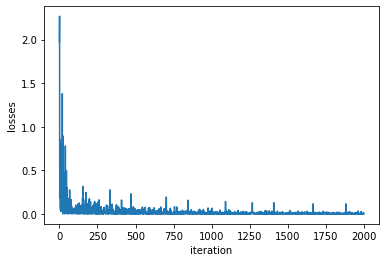

In [15]:
# plotting
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

**5. Accuracy có dùng làm hàm loss được không? Tại sao?**

Here I don't know what exactly the concept 'accuracy' is. If accuracy is a metric for model evaluation, then I have no idea. Because as far as I know in Linear Regression people often use MSE, MAE, R2-Score etc. to evaluate the model, not similar metrics like accuracy in the classification problem. If the accuracy here is just how fit and accurate the model is, then the loss function might not be descriptive. Because when the dataset contains outliers, during training, we only optimized for the smallest loss possible but inadvertently made the model not 'accurate' anymore. So small loss value doesn't mean high accuracy.

**6. Xây dựng hàm linear regression với cách tính loss $L = |output − label|$.**

- 1-Sample 
    1. Pick a sample $(x, y)$ from training data
    2. Calculate output o 
        $$o = \textbf{w}^T\textbf{x} + b$$
    3. Calculate losses
        $$L = |o − y| = \sqrt{(o - y)^2}$$
    4. Calculate gradients
        $$\textbf{L_w'} = \frac{\partial L}{\partial \textbf{w}} = \frac{\partial L}{\partial o} \frac{\partial o}{\partial \textbf{w}} = \textbf{x}\frac{o - y}{|o - y|}$$
        
        $$L_b'= \frac{\partial L}{\partial b} = \frac{\partial L}{\partial o} \frac{\partial o}{\partial b} = \frac{o - y}{|o - y|}$$
    5. Update weights
        $$\textbf{w} = \textbf{w} - \eta \textbf{L_w'}$$
        $$b = b - \eta L_b'$$
        

In [16]:
# forward
def predict(x, theta):
    return x.dot(theta)

# compute gradient
def gradient(z, y, x):
    dtheta = x*(z-y)/np.absolute(z-y)
    
    return dtheta

# update weights
def update_weight(theta, n, dtheta):
    dtheta_new = theta - n*dtheta
    
    return dtheta_new

In [17]:
# init weights
n = 0.01
theta = np.array([-0.34, -0.34, -0.34, 0.04]) #[w, b]

# how long
epoch_max = 10

# to plot
losses = [] 

# train
for epoch in range(epoch_max):
    # shuffle data
    normalized_df = shuffle(normalized_df)
    
    # convert to numpy array
    X = normalized_df.iloc[:, :-1].to_numpy()
    Y = normalized_df.iloc[:, -1].to_numpy()
    
    # concatenate ones-column [X, 1]
    X_ = np.c_[X, np.ones((data_size, 1))]
    
    for i in range(data_size):
        # get a sample
        x = X_[i]
        y = Y[i:i+1]
        print('sample: ', x, y)
        
        # predict z
        z = predict(x, theta)
        print('z: ', z)

        # compute loss
        loss = np.absolute(z-y)
        losses.append(loss[0])
        print('Loss: ', loss[0])
        
        # compute gradient
        dtheta = gradient(z, y, x)
        print('dtheta: ', dtheta)

        # update weights
        theta = update_weight(theta, n, dtheta)
        print('theta_new: ', theta)
        print('\n\n')

sample:  [0.60906324 0.21774194 0.51099384 1.        ] [0.64173228]
z:  -0.41485166635853643
Loss:  1.0565839498231033
dtheta:  [-0.60906324 -0.21774194 -0.51099384 -1.        ]
theta_new:  [-0.33390937 -0.33782258 -0.33489006  0.05      ]



sample:  [0.80689888 0.3125     0.23746702 1.        ] [0.7519685]
z:  -0.404525996963494
Loss:  1.1564945009005019
dtheta:  [-0.80689888 -0.3125     -0.23746702 -1.        ]
theta_new:  [-0.32584038 -0.33469758 -0.33251539  0.06      ]



sample:  [0.59621238 0.6733871  0.33773087 1.        ] [0.61023622]
z:  -0.4719518116621836
Loss:  1.0821880321346247
dtheta:  [-0.59621238 -0.6733871  -0.33773087 -1.        ]
theta_new:  [-0.31987825 -0.32796371 -0.32913808  0.07      ]



sample:  [0.40514034 0.57459677 0.12225154 1.        ] [0.49606299]
z:  -0.28828011339506576
Loss:  0.78434310552105
dtheta:  [-0.40514034 -0.57459677 -0.12225154 -1.        ]
theta_new:  [-0.31582685 -0.32221774 -0.32791557  0.08      ]



sample:  [0.01589449 0.60282258 0.

theta_new:  [-0.04346635 -0.07189516 -0.18962181  0.57      ]



sample:  [0.80960433 0.33669355 0.19876869 1.        ] [0.75984252]
z:  0.47291193804932097
Loss:  0.2869305816357184
dtheta:  [-0.80960433 -0.33669355 -0.19876869 -1.        ]
theta_new:  [-0.03537031 -0.06852823 -0.18763412  0.58      ]



sample:  [0.19918837 0.24193548 0.3764292  1.        ] [0.31889764]
z:  0.4857442732463413
Loss:  0.1668466354510657
dtheta:  [0.19918837 0.24193548 0.3764292  1.        ]
theta_new:  [-0.03736219 -0.07094758 -0.19139842  0.57      ]



sample:  [0.06121069 0.4375     0.44063325 1.        ] [0.21259843]
z:  0.45233696248832556
Loss:  0.23973853729147512
dtheta:  [0.06121069 0.4375     0.44063325 1.        ]
theta_new:  [-0.0379743  -0.07532258 -0.19580475  0.56      ]



sample:  [0.0557998  0.92540323 0.60686016 1.        ] [0.40944882]
z:  0.3693511815736332
Loss:  0.04009763732400462
dtheta:  [-0.0557998  -0.92540323 -0.60686016 -1.        ]
theta_new:  [-0.0374163  -0.06606855 -0.

z:  0.5473659633769691
Loss:  0.04712222559940893
dtheta:  [-0.36895502 -0.96370968 -0.44942832 -1.        ]
theta_new:  [ 0.06192425  0.01550403 -0.15075638  0.6       ]



sample:  [0.77578627 0.76209677 0.60598065 1.        ] [0.80708661]
z:  0.5685001068844915
Loss:  0.23858650728873687
dtheta:  [-0.77578627 -0.76209677 -0.60598065 -1.        ]
theta_new:  [ 0.06968211  0.023125   -0.14469657  0.61      ]



sample:  [0.08251606 0.51814516 0.37818821 1.        ] [0.27165354]
z:  0.573009462857133
Loss:  0.3013559195500463
dtheta:  [0.08251606 0.51814516 0.37818821 1.        ]
theta_new:  [ 0.06885695  0.01794355 -0.14847845  0.6       ]



sample:  [0.25566452 0.55443548 0.13808267 1.        ] [0.40944882]
z:  0.607050517589103
Loss:  0.19760169869146516
dtheta:  [0.25566452 0.55443548 0.13808267 1.        ]
theta_new:  [ 0.0663003   0.01239919 -0.14985928  0.59      ]



sample:  [0.03719986 0.74395161 0.39489886 1.        ] [0.22440945]
z:  0.5425115045361325
Loss:  0.31810205571

z:  0.5755095799074602
Loss:  0.20936784762399557
dtheta:  [0.12614136 0.8125     0.10202287 1.        ]
theta_new:  [ 0.15404464  0.06471774 -0.13104661  0.5       ]



sample:  [0.14338857 0.53830645 0.3060686  1.        ] [0.33464567]
z:  0.5168169647051399
Loss:  0.18217129541380134
dtheta:  [0.14338857 0.53830645 0.3060686  1.        ]
theta_new:  [ 0.15261075  0.05933468 -0.1341073   0.49      ]



sample:  [0.02671627 0.04233871 0.00615655 1.        ] [0.12598425]
z:  0.49576370464757735
Loss:  0.3697794526790734
dtheta:  [0.02671627 0.04233871 0.00615655 1.        ]
theta_new:  [ 0.15234359  0.05891129 -0.13416887  0.48      ]



sample:  [0.02603991 0.5483871  0.01583113 1.        ] [0.16141732]
z:  0.5141491588007115
Loss:  0.3527318359660659
dtheta:  [0.02603991 0.5483871  0.01583113 1.        ]
theta_new:  [ 0.15208319  0.05342742 -0.13432718  0.47      ]



sample:  [0.74974636 0.08669355 0.4353562  1.        ] [0.59448819]
z:  0.5301754638849833
Loss:  0.06431272509139474

sample:  [0.23638823 0.32258065 0.35620053 1.        ] [0.3503937]
z:  0.4494402683936485
Loss:  0.09904656760624686
dtheta:  [0.23638823 0.32258065 0.35620053 1.        ]
theta_new:  [ 0.29623267  0.09725806 -0.12584872  0.38      ]



sample:  [0.67095029 0.61693548 0.33773087 1.        ] [0.65748031]
z:  0.596256345628848
Loss:  0.06122396933178198
dtheta:  [-0.67095029 -0.61693548 -0.33773087 -1.        ]
theta_new:  [ 0.30294217  0.10342742 -0.12247142  0.39      ]



sample:  [0.08217788 0.22177419 0.2585752  1.        ] [0.22047244]
z:  0.40616460817926087
Loss:  0.18569216723437898
dtheta:  [0.08217788 0.22177419 0.2585752  1.        ]
theta_new:  [ 0.30212039  0.10120968 -0.12505717  0.38      ]



sample:  [0.63307406 0.34677419 0.15479332 1.        ] [0.71259843]
z:  0.5870034743998349
Loss:  0.12559495079701544
dtheta:  [-0.63307406 -0.34677419 -0.15479332 -1.        ]
theta_new:  [ 0.30845113  0.10467742 -0.12350923  0.39      ]



sample:  [0.69699019 0.10483871 0.1679859

sample:  [0.7612445  0.16532258 0.4942832  1.        ] [0.66141732]
z:  0.5789435100847232
Loss:  0.08247381274992238
dtheta:  [-0.7612445  -0.16532258 -0.4942832  -1.        ]
theta_new:  [ 0.3638654   0.10054435 -0.11361478  0.36      ]



sample:  [0.56712885 0.14314516 0.10993843 1.        ] [0.59448819]
z:  0.5682603743473348
Loss:  0.026227814629043222
dtheta:  [-0.56712885 -0.14314516 -0.10993843 -1.        ]
theta_new:  [ 0.36953669  0.10197581 -0.11251539  0.37      ]



sample:  [0.16672303 0.23387097 0.15919085 1.        ] [0.26771654]
z:  0.43754803651947105
Loss:  0.16983150108640016
dtheta:  [0.16672303 0.23387097 0.15919085 1.        ]
theta_new:  [ 0.36786946  0.0996371  -0.1141073   0.36      ]



sample:  [0.46838011 0.28830645 0.22251539 1.        ] [0.41732283]
z:  0.5356381283675179
Loss:  0.11831529372184857
dtheta:  [0.46838011 0.28830645 0.22251539 1.        ]
theta_new:  [ 0.36318566  0.09675403 -0.11633245  0.35      ]



sample:  [0.79066622 0.06854839 0.7431


sample:  [0.67331755 0.0625     0.30167106 1.        ] [0.58267717]
z:  0.5864924947371153
Loss:  0.0038153293827846158
dtheta:  [0.67331755 0.0625     0.30167106 1.        ]
theta_new:  [ 0.39541089  0.146875   -0.08090589  0.32      ]



sample:  [0.80689888 0.3125     0.23746702 1.        ] [0.7519685]
z:  0.6657425617758574
Loss:  0.08622594216115043
dtheta:  [-0.80689888 -0.3125     -0.23746702 -1.        ]
theta_new:  [ 0.40347988  0.15       -0.07853122  0.33      ]



sample:  [0.31518431 0.87701613 0.44151275 1.        ] [0.53937008]
z:  0.5540504095061981
Loss:  0.014680330766040584
dtheta:  [0.31518431 0.87701613 0.44151275 1.        ]
theta_new:  [ 0.40032804  0.14122984 -0.08294635  0.32      ]



sample:  [0.74974636 0.08669355 0.4353562  1.        ] [0.59448819]
z:  0.5962769970533035
Loss:  0.0017888080769254966
dtheta:  [0.74974636 0.08669355 0.4353562  1.        ]
theta_new:  [ 0.39283057  0.1403629  -0.08729991  0.31      ]



sample:  [0.62292864 0.4233871  0.19085

sample:  [1.         0.73185484 0.88478452 1.        ] [0.87401575]
z:  0.7553936171559943
Loss:  0.11862213087550177
dtheta:  [-1.         -0.73185484 -0.88478452 -1.        ]
theta_new:  [ 0.46138316  0.1516129  -0.07206684  0.28      ]



sample:  [0.56712885 0.14314516 0.10993843 1.        ] [0.59448819]
z:  0.5554434363118219
Loss:  0.03904475266455609
dtheta:  [-0.56712885 -0.14314516 -0.10993843 -1.        ]
theta_new:  [ 0.46705445  0.15304435 -0.07096746  0.29      ]



sample:  [0.62292864 0.4233871  0.19085312 1.        ] [0.74409449]
z:  0.6321942374344384
Loss:  0.11190025075453802
dtheta:  [-0.62292864 -0.4233871  -0.19085312 -1.        ]
theta_new:  [ 0.47328373  0.15727823 -0.06905893  0.3       ]



sample:  [0.32127156 0.02822581 0.06244503 1.        ] [0.40551181]
z:  0.45217952085947943
Loss:  0.04666770983585733
dtheta:  [0.32127156 0.02822581 0.06244503 1.        ]
theta_new:  [ 0.47007102  0.15699597 -0.06968338  0.29      ]



sample:  [0.46939466 0.04233871 0.2

Loss:  0.08943813778082038
dtheta:  [0.12614136 0.8125     0.10202287 1.        ]
theta_new:  [ 0.51685492  0.17189516 -0.06024626  0.24      ]



sample:  [0.22387555 0.2358871  0.32102023 1.        ] [0.31889764]
z:  0.3769187610798554
Loss:  0.05802112328457981
dtheta:  [0.22387555 0.2358871  0.32102023 1.        ]
theta_new:  [ 0.51461617  0.16953629 -0.06345646  0.23      ]



sample:  [0.26208996 0.94354839 0.30079156 1.        ] [0.51181102]
z:  0.5057542526518821
Loss:  0.006056770970165104
dtheta:  [-0.26208996 -0.94354839 -0.30079156 -1.        ]
theta_new:  [ 0.51723706  0.17897177 -0.06044855  0.24      ]



sample:  [0.2962462  0.5141129  0.64291996 1.        ] [0.44488189]
z:  0.4463776320908368
Loss:  0.0014957423270572368
dtheta:  [0.2962462  0.5141129  0.64291996 1.        ]
theta_new:  [ 0.5142746   0.17383065 -0.06687775  0.23      ]



sample:  [0.59621238 0.1875     0.05364996 1.        ] [0.51968504]
z:  0.5656221411838236
Loss:  0.045937101813744774
dtheta:  [0.5

sample:  [0.95671288 0.84677419 0.57959543 1.        ] [0.94094488]
z:  0.8884879798799092
Loss:  0.052456902009854534
dtheta:  [-0.95671288 -0.84677419 -0.57959543 -1.        ]
theta_new:  [ 0.57175854  0.18582661 -0.04518909  0.24      ]



sample:  [0.45180927 0.09879032 0.07915567 1.        ] [0.48818898]
z:  0.5131067038310009
Loss:  0.0249177274530481
dtheta:  [0.45180927 0.09879032 0.07915567 1.        ]
theta_new:  [ 0.56724045  0.18483871 -0.04598065  0.23      ]



sample:  [0.70645925 0.41532258 0.09146878 1.        ] [0.75984252]
z:  0.7032941558871209
Loss:  0.0565483637979185
dtheta:  [-0.70645925 -0.41532258 -0.09146878 -1.        ]
theta_new:  [ 0.57430504  0.18899194 -0.04506596  0.24      ]



sample:  [0.63476496 0.36491935 0.22251539 1.        ] [0.72047244]
z:  0.6634876623766136
Loss:  0.056984778568268224
dtheta:  [-0.63476496 -0.36491935 -0.22251539 -1.        ]
theta_new:  [ 0.58065269  0.19264113 -0.04284081  0.25      ]



sample:  [0.67095029 0.61693548 0.33

sample:  [0.44301657 0.37096774 0.30167106 1.        ] [0.44488189]
z:  0.4844767956596197
Loss:  0.03959490589584014
dtheta:  [0.44301657 0.37096774 0.30167106 1.        ]
theta_new:  [ 0.56685154  0.17790323 -0.05599824  0.17      ]



sample:  [0.58978695 0.45362903 0.27440633 1.        ] [0.57086614]
z:  0.5696574342136265
Loss:  0.0012087075186570928
dtheta:  [-0.58978695 -0.45362903 -0.27440633 -1.        ]
theta_new:  [ 0.57274941  0.18243952 -0.05325418  0.18      ]



sample:  [0.08217788 0.22177419 0.2585752  1.        ] [0.22047244]
z:  0.25375750088193905
Loss:  0.03328505993705716
dtheta:  [0.08217788 0.22177419 0.2585752  1.        ]
theta_new:  [ 0.57192763  0.18022177 -0.05583993  0.17      ]



sample:  [0.54988164 0.63709677 0.46262093 1.        ] [0.6023622]
z:  0.5734784916269926
Loss:  0.028883713097416885
dtheta:  [-0.54988164 -0.63709677 -0.46262093 -1.        ]
theta_new:  [ 0.57742645  0.18659274 -0.05121372  0.18      ]



sample:  [0.35136963 0.11491935 0.299

Loss:  0.19894494898392123
dtheta:  [0.94690565 0.28024194 0.32277924 1.        ]
theta_new:  [ 0.5916909   0.19006048 -0.04498681  0.15      ]



sample:  [0.9773419  0.85282258 0.44766931 1.        ] [0.93700787]
z:  0.8702329711618914
Loss:  0.06677490285385657
dtheta:  [-0.9773419  -0.85282258 -0.44766931 -1.        ]
theta_new:  [ 0.60146432  0.19858871 -0.04051011  0.16      ]



sample:  [0.23097734 0.1875     0.00527704 1.        ] [0.38188976]
z:  0.3359462397056511
Loss:  0.04594352407387653
dtheta:  [-0.23097734 -0.1875     -0.00527704 -1.        ]
theta_new:  [ 0.6037741   0.20046371 -0.04045734  0.17      ]



sample:  [0.50422726 0.02620968 0.21108179 1.        ] [0.33464567]
z:  0.4711536365979207
Loss:  0.1365079673065821
dtheta:  [0.50422726 0.02620968 0.21108179 1.        ]
theta_new:  [ 0.59873182  0.20020161 -0.04256816  0.16      ]



sample:  [0.4582347  0.38709677 0.14335972 1.        ] [0.45669291]
z:  0.5057545344423963
Loss:  0.04906162105656947
dtheta:  [0.45

sample:  [0.89584038 0.40322581 0.         1.        ] [0.62204724]
z:  0.7744037408525418
Loss:  0.15235649675805363
dtheta:  [0.89584038 0.40322581 0.         1.        ]
theta_new:  [ 0.58935746  0.24002016 -0.02260334  0.13      ]



sample:  [0.8867095  0.07056452 0.16886544 1.        ] [0.60629921]
z:  0.6657088409408617
Loss:  0.05940962834243646
dtheta:  [0.8867095  0.07056452 0.16886544 1.        ]
theta_new:  [ 0.58049036  0.23931452 -0.024292    0.12      ]



sample:  [0.83902604 0.54637097 0.19876869 1.        ] [0.68110236]
z:  0.7329725449741458
Loss:  0.05187018276942146
dtheta:  [0.83902604 0.54637097 0.19876869 1.        ]
theta_new:  [ 0.5721001   0.23385081 -0.02627968  0.11      ]



sample:  [0.65268854 0.71370968 0.66226913 1.        ] [0.69291339]
z:  0.6329005380879842
Loss:  0.060012847738787456
dtheta:  [-0.65268854 -0.71370968 -0.66226913 -1.        ]
theta_new:  [ 0.57862699  0.2409879  -0.01965699  0.12      ]



sample:  [0.69699019 0.10483871 0.16798593 

dtheta:  [-0.93405479 -0.9858871  -0.3649956  -1.        ]
theta_new:  [ 0.6167467   0.24032258 -0.02905893  0.14      ]



sample:  [0.63307406 0.34677419 0.15479332 1.        ] [0.71259843]
z:  0.609285881482305
Loss:  0.10331254371454535
dtheta:  [-0.63307406 -0.34677419 -0.15479332 -1.        ]
theta_new:  [ 0.62307744  0.24379032 -0.02751099  0.15      ]



sample:  [0.43523842 0.11491935 0.27264732 1.        ] [0.37007874]
z:  0.44170266822395615
Loss:  0.07162392806647583
dtheta:  [0.43523842 0.11491935 0.27264732 1.        ]
theta_new:  [ 0.61872506  0.24264113 -0.03023747  0.14      ]



sample:  [0.14305039 0.52217742 0.17766051 1.        ] [0.31496063]
z:  0.34983857511519567
Loss:  0.03487794519393583
dtheta:  [0.14305039 0.52217742 0.17766051 1.        ]
theta_new:  [ 0.61729456  0.23741935 -0.03201407  0.13      ]



sample:  [0.37199865 0.81854839 0.5532102  1.        ] [0.56692913]
z:  0.5362614581961458
Loss:  0.030667675662121918
dtheta:  [-0.37199865 -0.81854839 -0.5

z:  0.9393231816292336
Loss:  0.0291807553786404
dtheta:  [-0.97024011 -0.86693548 -0.62884785 -1.        ]
theta_new:  [ 0.6364491   0.24475806 -0.01509235  0.15      ]



sample:  [0.59621238 0.6733871  0.33773087 1.        ] [0.61023622]
z:  0.6891786038387626
Loss:  0.07894238336632153
dtheta:  [0.59621238 0.6733871  0.33773087 1.        ]
theta_new:  [ 0.63048698  0.23802419 -0.01846966  0.14      ]



sample:  [0.35136963 0.11491935 0.29991205 1.        ] [0.34645669]
z:  0.38334829185221614
Loss:  0.03689159893883026
dtheta:  [0.35136963 0.11491935 0.29991205 1.        ]
theta_new:  [ 0.62697328  0.236875   -0.02146878  0.13      ]



sample:  [0.85593507 0.42943548 0.26121372 1.        ] [0.62992126]
z:  0.7627630120831664
Loss:  0.13284175224064676
dtheta:  [0.85593507 0.42943548 0.26121372 1.        ]
theta_new:  [ 0.61841393  0.23258065 -0.02408091  0.12      ]



sample:  [0.32735881 0.15322581 0.06068602 1.        ] [0.47637795]
z:  0.3566192311126898
Loss:  0.119758721643

sample:  [0.80047345 0.10282258 0.20404573 1.        ] [0.62598425]
z:  0.647301227455292
Loss:  0.021316975486788015
dtheta:  [0.80047345 0.10282258 0.20404573 1.        ]
theta_new:  [ 0.61494758  0.20846774 -0.01623571  0.12      ]



sample:  [0.90023673 0.88306452 0.04133685 1.        ] [0.93700787]
z:  0.8570177307547634
Loss:  0.07999014326098453
dtheta:  [-0.90023673 -0.88306452 -0.04133685 -1.        ]
theta_new:  [ 0.62394995  0.21729839 -0.01582234  0.13      ]



sample:  [0.42272574 0.74395161 0.6939314  1.        ] [0.56299213]
z:  0.5444395686417434
Loss:  0.018552557342508713
dtheta:  [-0.42272574 -0.74395161 -0.6939314  -1.        ]
theta_new:  [ 0.62817721  0.2247379  -0.00888303  0.14      ]



sample:  [0.23097734 0.1875     0.00527704 1.        ] [0.38188976]
z:  0.32718618216034007
Loss:  0.054703581619187536
dtheta:  [-0.23097734 -0.1875     -0.00527704 -1.        ]
theta_new:  [ 0.63048698  0.2266129  -0.00883026  0.15      ]



sample:  [0.31619885 0.09879032 0

sample:  [0.05816706 0.75806452 0.18733509 1.        ] [0.2519685]
z:  0.3126099356850328
Loss:  0.06064143174802489
dtheta:  [0.05816706 0.75806452 0.18733509 1.        ]
theta_new:  [ 0.61153534  0.20020161 -0.00458223  0.11      ]



sample:  [0.14879946 0.52016129 0.17854002 1.        ] [0.33464567]
z:  0.3043151448404171
Loss:  0.030330524450921492
dtheta:  [-0.14879946 -0.52016129 -0.17854002 -1.        ]
theta_new:  [ 0.61302333  0.20540323 -0.00279683  0.12      ]



sample:  [0.80892797 0.83669355 0.16007036 1.        ] [0.8503937]
z:  0.7873035836561024
Loss:  0.06309011713129908
dtheta:  [-0.80892797 -0.83669355 -0.16007036 -1.        ]
theta_new:  [ 0.62111261  0.21377016 -0.00119613  0.13      ]



sample:  [0.25228272 0.40927419 0.28320141 1.        ] [0.38188976]
z:  0.37384784370225305
Loss:  0.008041920077274556
dtheta:  [-0.25228272 -0.40927419 -0.28320141 -1.        ]
theta_new:  [0.62363544 0.2178629  0.00163588 0.14      ]



sample:  [0.05478526 0.88104839 0.78364

dtheta:  [-0.69732837 -0.16935484 -0.22955145 -1.        ]
theta_new:  [ 0.62691917  0.19671371 -0.01049252  0.13      ]



sample:  [0.08217788 0.22177419 0.2585752  1.        ] [0.22047244]
z:  0.2224318083995847
Loss:  0.0019593674547028206
dtheta:  [0.08217788 0.22177419 0.2585752  1.        ]
theta_new:  [ 0.6260974   0.19449597 -0.01307828  0.12      ]



sample:  [0.94927291 0.7983871  0.48812665 1.        ] [0.8976378]
z:  0.8632365140390091
Loss:  0.03440128123658137
dtheta:  [-0.94927291 -0.7983871  -0.48812665 -1.        ]
theta_new:  [ 0.63559013  0.20247984 -0.00819701  0.13      ]



sample:  [0.17855935 0.04032258 0.18557608 1.        ] [0.25590551]
z:  0.25013390077329767
Loss:  0.005771611037725943
dtheta:  [-0.17855935 -0.04032258 -0.18557608 -1.        ]
theta_new:  [ 0.63737572  0.20288306 -0.00634125  0.14      ]



sample:  [0.26208996 0.94354839 0.30079156 1.        ] [0.51181102]
z:  0.49657236824049367
Loss:  0.015238655381553556
dtheta:  [-0.26208996 -0.943548

theta_new:  [ 0.62369293  0.22314516 -0.00105541  0.14      ]



sample:  [0.06391613 0.40524194 0.14687775 1.        ] [0.23622047]
z:  0.27013680024243003
Loss:  0.033916327801485124
dtheta:  [0.06391613 0.40524194 0.14687775 1.        ]
theta_new:  [ 0.62305377  0.21909274 -0.00252419  0.13      ]



sample:  [1.         0.73185484 0.88478452 1.        ] [0.87401575]
z:  0.9111644929220334
Loss:  0.03714874489053732
dtheta:  [1.         0.73185484 0.88478452 1.        ]
theta_new:  [ 0.61305377  0.21177419 -0.01137203  0.12      ]



sample:  [0.93405479 0.9858871  0.3649956  1.        ] [1.]
z:  0.897260511455145
Loss:  0.10273948854485504
dtheta:  [-0.93405479 -0.9858871  -0.3649956  -1.        ]
theta_new:  [ 0.62239432  0.22163306 -0.00772208  0.13      ]



sample:  [0.2962462  0.5141129  0.64291996 1.        ] [0.44488189]
z:  0.4233616906082772
Loss:  0.02152019915550235
dtheta:  [-0.2962462  -0.5141129  -0.64291996 -1.        ]
theta_new:  [ 0.62535678  0.22677419 -0.0012928

Loss:  0.0370154010832785
dtheta:  [0.66587758 0.46975806 0.12225154 1.        ]
theta_new:  [ 0.61172472  0.19971774 -0.00307828  0.11      ]



sample:  [0.55765979 0.2016129  0.15215479 1.        ] [0.62992126]
z:  0.49093157895551004
Loss:  0.13898968088700964
dtheta:  [-0.55765979 -0.2016129  -0.15215479 -1.        ]
theta_new:  [ 0.61730132  0.20173387 -0.00155673  0.12      ]



sample:  [0.31518431 0.87701613 0.44151275 1.        ] [0.53937008]
z:  0.4908002325296092
Loss:  0.04856984621054833
dtheta:  [-0.31518431 -0.87701613 -0.44151275 -1.        ]
theta_new:  [0.62045316 0.21050403 0.0028584  0.13      ]



sample:  [0.03719986 0.74395161 0.39489886 1.        ] [0.22440945]
z:  0.3108143666308727
Loss:  0.08640491781197507
dtheta:  [0.03719986 0.74395161 0.39489886 1.        ]
theta_new:  [ 0.62008116  0.20306452 -0.00109059  0.12      ]



sample:  [0.72607372 0.47580645 0.50395778 1.        ] [0.61023622]
z:  0.6662944349741664
Loss:  0.05605821450172532
dtheta:  [0.72607

theta_new:  [ 0.62335813  0.23790323 -0.01458223  0.11      ]



sample:  [0.550558   0.74193548 0.06244503 1.        ] [0.64566929]
z:  0.6287930627625851
Loss:  0.016876228575997576
dtheta:  [-0.550558   -0.74193548 -0.06244503 -1.        ]
theta_new:  [ 0.62886371  0.24532258 -0.01395778  0.12      ]



sample:  [0.02705445 0.9858871  0.65699208 1.        ] [0.22047244]
z:  0.36970377348355404
Loss:  0.14923133253867216
dtheta:  [0.02705445 0.9858871  0.65699208 1.        ]
theta_new:  [ 0.62859317  0.23546371 -0.0205277   0.11      ]



sample:  [0.84612783 0.7358871  0.63324538 1.        ] [0.81102362]
z:  0.8021458068808743
Loss:  0.008877815166369762
dtheta:  [-0.84612783 -0.7358871  -0.63324538 -1.        ]
theta_new:  [ 0.63705445  0.24282258 -0.01419525  0.12      ]



sample:  [0.36083869 0.28225806 0.09322779 1.        ] [0.38976378]
z:  0.4170891305290295
Loss:  0.027325351001470433
dtheta:  [0.36083869 0.28225806 0.09322779 1.        ]
theta_new:  [ 0.63344606  0.24      




sample:  [0.4721001  0.03830645 0.07651715 1.        ] [0.34251969]
z:  0.4055176812722431
Loss:  0.06299799623287294
dtheta:  [0.4721001  0.03830645 0.07651715 1.        ]
theta_new:  [ 0.62712885  0.2290121  -0.02123131  0.09      ]



sample:  [0.60906324 0.21774194 0.51099384 1.        ] [0.64173228]
z:  0.5109775954521192
Loss:  0.13075468801244772
dtheta:  [-0.60906324 -0.21774194 -0.51099384 -1.        ]
theta_new:  [ 0.63321948  0.23118952 -0.01612137  0.1       ]



sample:  [0.25295908 0.21774194 0.05013193 1.        ] [0.40551181]
z:  0.3097100742650616
Loss:  0.09580173675856052
dtheta:  [-0.25295908 -0.21774194 -0.05013193 -1.        ]
theta_new:  [ 0.63574907  0.23336694 -0.01562005  0.11      ]



sample:  [0.83767332 0.60887097 0.1759015  1.        ] [0.73228346]
z:  0.7818927938102521
Loss:  0.049609329243323064
dtheta:  [0.83767332 0.60887097 0.1759015  1.        ]
theta_new:  [ 0.62737234  0.22727823 -0.01737907  0.1       ]



sample:  [0.76597903 0.31854839 0.43

sample:  [0.9773419  0.85282258 0.44766931 1.        ] [0.93700787]
z:  0.9077450958616795
Loss:  0.029262778154068414
dtheta:  [-0.9773419  -0.85282258 -0.44766931 -1.        ]
theta_new:  [0.61139669 0.24217742 0.00557608 0.13      ]



sample:  [0.69699019 0.10483871 0.16798593 1.        ] [0.61417323]
z:  0.5824637646050135
Loss:  0.03170946374144323
dtheta:  [-0.69699019 -0.10483871 -0.16798593 -1.        ]
theta_new:  [0.61836659 0.24322581 0.00725594 0.14      ]



sample:  [0.03719986 0.74395161 0.39489886 1.        ] [0.22440945]
z:  0.3468167455231206
Loss:  0.12240729670422296
dtheta:  [0.03719986 0.74395161 0.39489886 1.        ]
theta_new:  [0.61799459 0.23578629 0.00330695 0.13      ]



sample:  [0.14305039 0.52217742 0.17766051 1.        ] [0.31496063]
z:  0.34211415700298153
Loss:  0.027153527081721696
dtheta:  [0.14305039 0.52217742 0.17766051 1.        ]
theta_new:  [0.61656409 0.23056452 0.00153034 0.12      ]



sample:  [0.80858979 0.08266129 0.32189974 1.        

z:  0.38382109203377224
Loss:  0.02161636762432334
dtheta:  [0.13121407 0.82862903 0.04837291 1.        ]
theta_new:  [0.60555969 0.21340726 0.00963061 0.11      ]



sample:  [0.81501522 0.76612903 0.20140721 1.        ] [0.79527559]
z:  0.7689775316911454
Loss:  0.026298058860035778
dtheta:  [-0.81501522 -0.76612903 -0.20140721 -1.        ]
theta_new:  [0.61370984 0.22106855 0.01164468 0.12      ]



sample:  [0.02603991 0.5483871  0.01583113 1.        ] [0.16141732]
z:  0.2573964340665196
Loss:  0.09597911123187391
dtheta:  [0.02603991 0.5483871  0.01583113 1.        ]
theta_new:  [0.61344944 0.21558468 0.01148637 0.11      ]



sample:  [0.32296246 0.2983871  0.33948989 1.        ] [0.42125984]
z:  0.3763483337126685
Loss:  0.04491150880701661
dtheta:  [-0.32296246 -0.2983871  -0.33948989 -1.        ]
theta_new:  [0.61667907 0.21856855 0.01488127 0.12      ]



sample:  [0.02671627 0.04233871 0.00615655 1.        ] [0.12598425]
z:  0.14582088989106062
Loss:  0.019836637922556688
dt

theta_new:  [0.65669936 0.22389113 0.02907652 0.14      ]



sample:  [0.99053094 0.55846774 0.01319261 1.        ] [0.7519685]
z:  0.9159006026363632
Loss:  0.16393209869935532
dtheta:  [0.99053094 0.55846774 0.01319261 1.        ]
theta_new:  [0.64679405 0.21830645 0.02894459 0.13      ]



sample:  [0.41393304 0.69758065 0.1064204  1.        ] [0.53543307]
z:  0.5530960771555149
Loss:  0.017663006289373118
dtheta:  [0.41393304 0.69758065 0.1064204  1.        ]
theta_new:  [0.64265472 0.21133065 0.02788039 0.12      ]



sample:  [0.72607372 0.47580645 0.50395778 1.        ] [0.61023622]
z:  0.7012177260843842
Loss:  0.09098150561194307
dtheta:  [0.72607372 0.47580645 0.50395778 1.        ]
theta_new:  [0.63539398 0.20657258 0.02284081 0.11      ]



sample:  [0.10415962 0.49596774 0.01671064 1.        ] [0.37007874]
z:  0.2790174172876307
Loss:  0.09106132286984964
dtheta:  [-0.10415962 -0.49596774 -0.01671064 -1.        ]
theta_new:  [0.63643558 0.21153226 0.02300792 0.12      ]




Loss:  0.00955192249560316
dtheta:  [-0.13121407 -0.82862903 -0.04837291 -1.        ]
theta_new:  [0.60694623 0.21701613 0.00514512 0.11      ]



sample:  [0.80047345 0.10282258 0.20404573 1.        ] [0.62598425]
z:  0.6192083417945232
Loss:  0.006775910173980715
dtheta:  [-0.80047345 -0.10282258 -0.20404573 -1.        ]
theta_new:  [0.61495096 0.21804435 0.00718558 0.12      ]



sample:  [0.59181603 0.31048387 0.01846966 1.        ] [0.61023622]
z:  0.5517698083602478
Loss:  0.05846641211219328
dtheta:  [-0.59181603 -0.31048387 -0.01846966 -1.        ]
theta_new:  [0.62086912 0.22114919 0.00737027 0.13      ]



sample:  [0.56171796 0.84677419 0.02902375 1.        ] [0.70866142]
z:  0.6662306791496486
Loss:  0.0424307381731861
dtheta:  [-0.56171796 -0.84677419 -0.02902375 -1.        ]
theta_new:  [0.6264863  0.22961694 0.00766051 0.14      ]



sample:  [0.75515725 0.0483871  0.13456464 1.        ] [0.59055118]
z:  0.6252370074368419
Loss:  0.034685826334479586
dtheta:  [0.75515725

sample:  [0.68785932 0.66330645 0.40193492 1.        ] [0.68503937]
z:  0.7099664999504841
Loss:  0.024927129871743947
dtheta:  [0.68785932 0.66330645 0.40193492 1.        ]
theta_new:  [0.60623267 0.2290121  0.02565523 0.11      ]



sample:  [0.42272574 0.74395161 0.6939314  1.        ] [0.56299213]
z:  0.5544470411239897
Loss:  0.008545084860262397
dtheta:  [-0.42272574 -0.74395161 -0.6939314  -1.        ]
theta_new:  [0.61045993 0.23645161 0.03259455 0.12      ]



sample:  [0.58099425 0.36491935 0.26737027 1.        ] [0.58267717]
z:  0.5696742901606784
Loss:  0.013002875193652286
dtheta:  [-0.58099425 -0.36491935 -0.26737027 -1.        ]
theta_new:  [0.61626987 0.24010081 0.03526825 0.13      ]



sample:  [0.33716605 0.19354839 0.02902375 1.        ] [0.35826772]
z:  0.38528001568926157
Loss:  0.027012299153828467
dtheta:  [0.33716605 0.19354839 0.02902375 1.        ]
theta_new:  [0.61289821 0.23816532 0.03497801 0.12      ]



sample:  [0.36895502 0.28830645 0.27616535 1.      

sample:  [0.83902604 0.54637097 0.19876869 1.        ] [0.68110236]
z:  0.7337360617827009
Loss:  0.05263369957797659
dtheta:  [0.83902604 0.54637097 0.19876869 1.        ]
theta_new:  [0.60607372 0.20431452 0.01596306 0.09      ]



sample:  [0.04227257 0.32056452 0.43359719 1.        ] [0.15748031]
z:  0.18803781823807744
Loss:  0.030557503277447523
dtheta:  [0.04227257 0.32056452 0.43359719 1.        ]
theta_new:  [0.605651   0.20110887 0.01162709 0.08      ]



sample:  [0.92323301 0.58266129 0.52242744 1.        ] [0.75590551]
z:  0.7624096559020199
Loss:  0.006504144090996311
dtheta:  [0.92323301 0.58266129 0.52242744 1.        ]
theta_new:  [0.59641867 0.19528226 0.00640281 0.07      ]



sample:  [0.78254988 0.1733871  0.07387863 1.        ] [0.66141732]
z:  0.5710598126337806
Loss:  0.09035751020086502
dtheta:  [-0.78254988 -0.1733871  -0.07387863 -1.        ]
theta_new:  [0.60424417 0.19701613 0.0071416  0.08      ]



sample:  [0.02671627 0.04233871 0.00615655 1.        ] [0

theta_new:  [0.62515387 0.20683468 0.00762533 0.14      ]



sample:  [0.68244843 0.44959677 0.27528584 1.        ] [0.59055118]
z:  0.6617266260636185
Loss:  0.07117544496125627
dtheta:  [0.68244843 0.44959677 0.27528584 1.        ]
theta_new:  [0.61832939 0.20233871 0.00487247 0.13      ]



sample:  [0.65099763 0.37096774 0.57519789 1.        ] [0.73228346]
z:  0.6103947372782159
Loss:  0.12188872728871314
dtheta:  [-0.65099763 -0.37096774 -0.57519789 -1.        ]
theta_new:  [0.62483936 0.20604839 0.01062445 0.14      ]



sample:  [0.1481231  0.79233871 0.39401935 1.        ] [0.34645669]
z:  0.39999949437349247
Loss:  0.05354280146010659
dtheta:  [0.1481231  0.79233871 0.39401935 1.        ]
theta_new:  [0.62335813 0.198125   0.00668426 0.13      ]



sample:  [0.69699019 0.10483871 0.16798593 1.        ] [0.61417323]
z:  0.5863685358877841
Loss:  0.027804692458672564
dtheta:  [-0.69699019 -0.10483871 -0.16798593 -1.        ]
theta_new:  [0.63032804 0.19917339 0.00836412 0.14    

theta_new:  [0.61905648 0.20979839 0.00634125 0.11      ]



sample:  [0.39398039 0.29637097 0.04485488 1.        ] [0.40551181]
z:  0.41635869612020815
Loss:  0.010846885096586045
dtheta:  [0.39398039 0.29637097 0.04485488 1.        ]
theta_new:  [0.61511667 0.20683468 0.0058927  0.1       ]



sample:  [0.56171796 0.84677419 0.02902375 1.        ] [0.70866142]
z:  0.6208353761264738
Loss:  0.08782604119636095
dtheta:  [-0.56171796 -0.84677419 -0.02902375 -1.        ]
theta_new:  [0.62073385 0.21530242 0.00618294 0.11      ]



sample:  [0.74974636 0.08669355 0.4353562  1.        ] [0.59448819]
z:  0.5967500597154396
Loss:  0.002261870739061589
dtheta:  [0.74974636 0.08669355 0.4353562  1.        ]
theta_new:  [0.61323639 0.21443548 0.00182938 0.1       ]



sample:  [0.68785932 0.66330645 0.40193492 1.        ] [0.68503937]
z:  0.664792092906877
Loss:  0.020247277171863143
dtheta:  [-0.68785932 -0.66330645 -0.40193492 -1.        ]
theta_new:  [0.62011498 0.22106855 0.00584872 0.11   

theta_new:  [0.63205952 0.24364919 0.01044855 0.15      ]



sample:  [0.22894826 0.89717742 0.31046614 1.        ] [0.47244094]
z:  0.5165494015438608
Loss:  0.04410845666197094
dtheta:  [0.22894826 0.89717742 0.31046614 1.        ]
theta_new:  [0.62977004 0.23467742 0.00734389 0.14      ]



sample:  [0.4582347  0.38709677 0.14335972 1.        ] [0.45669291]
z:  0.5204781720251691
Loss:  0.06378525863934231
dtheta:  [0.4582347  0.38709677 0.14335972 1.        ]
theta_new:  [0.62518769 0.23080645 0.00591029 0.13      ]



sample:  [0.25025364 0.99596774 0.39929639 1.        ] [0.51574803]
z:  0.5186912303288391
Loss:  0.0029431988327761616
dtheta:  [0.25025364 0.99596774 0.39929639 1.        ]
theta_new:  [0.62268515 0.22084677 0.00191733 0.12      ]



sample:  [0.76597903 0.31854839 0.43623571 1.        ] [0.71653543]
z:  0.6681505618137575
Loss:  0.048384871257108664
dtheta:  [-0.76597903 -0.31854839 -0.43623571 -1.        ]
theta_new:  [0.63034494 0.22403226 0.00627968 0.13      ]

z:  0.6045492343539705
Loss:  0.1080491908428799
dtheta:  [-0.63307406 -0.34677419 -0.15479332 -1.        ]
theta_new:  [0.62427798 0.24197581 0.00564644 0.14      ]



sample:  [0.12681772 0.07459677 0.11873351 1.        ] [0.23622047]
z:  0.23789054703910023
Loss:  0.0016700745981553244
dtheta:  [0.12681772 0.07459677 0.11873351 1.        ]
theta_new:  [0.62300981 0.24122984 0.0044591  0.13      ]



sample:  [0.80689888 0.3125     0.23746702 1.        ] [0.7519685]
z:  0.7091491326512216
Loss:  0.04281937128578628
dtheta:  [-0.80689888 -0.3125     -0.23746702 -1.        ]
theta_new:  [0.6310788  0.24435484 0.00683377 0.14      ]



sample:  [0.37199865 0.81854839 0.5532102  1.        ] [0.56692913]
z:  0.578557230563267
Loss:  0.011628096704999313
dtheta:  [0.37199865 0.81854839 0.5532102  1.        ]
theta_new:  [0.62735881 0.23616935 0.00130167 0.13      ]



sample:  [0.         0.7983871  0.07387863 1.        ] [0.]
z:  0.3186507312290002
Loss:  0.3186507312290002
dtheta:  [0.  

theta_new:  [6.16936084e-01 2.24737903e-01 1.05540897e-04 1.20000000e-01]



sample:  [0.45485289 0.84072581 0.40105541 1.        ] [0.61417323]
z:  0.589600444261283
Loss:  0.024572784085173716
dtheta:  [-0.45485289 -0.84072581 -0.40105541 -1.        ]
theta_new:  [0.62148461 0.23314516 0.00411609 0.13      ]



sample:  [0.25228272 0.40927419 0.28320141 1.        ] [0.38188976]
z:  0.3833758096714569
Loss:  0.0014860458919292996
dtheta:  [0.25228272 0.40927419 0.28320141 1.        ]
theta_new:  [0.61896179 0.22905242 0.00128408 0.12      ]



sample:  [0.12242137 0.77822581 0.57431838 1.        ] [0.36220472]
z:  0.3747661266800669
Loss:  0.012561402270618027
dtheta:  [0.12242137 0.77822581 0.57431838 1.        ]
theta_new:  [ 0.61773757  0.22127016 -0.0044591   0.11      ]



sample:  [0.47548191 0.54032258 0.40369393 1.        ] [0.54724409]
z:  0.521480190691251
Loss:  0.025763903796938048
dtheta:  [-0.47548191 -0.54032258 -0.40369393 -1.        ]
theta_new:  [ 6.22492391e-01  2.2

dtheta:  [0.06391613 0.40524194 0.14687775 1.        ]
theta_new:  [ 0.61831248  0.20608871 -0.01840809  0.11      ]



sample:  [0.71051742 1.         0.3289358  1.        ] [0.87401575]
z:  0.7493554144066192
Loss:  0.12466033362487683
dtheta:  [-0.71051742 -1.         -0.3289358  -1.        ]
theta_new:  [ 0.62541765  0.21608871 -0.01511873  0.12      ]



sample:  [0.67095029 0.61693548 0.33773087 1.        ] [0.65748031]
z:  0.6678308837085172
Loss:  0.010350568747887201
dtheta:  [0.67095029 0.61693548 0.33773087 1.        ]
theta_new:  [ 0.61870815  0.20991935 -0.01849604  0.11      ]



sample:  [0.0557998  0.08266129 0.27528584 1.        ] [0.16929134]
z:  0.15678429545518674
Loss:  0.012507043127490458
dtheta:  [-0.0557998  -0.08266129 -0.27528584 -1.        ]
theta_new:  [ 0.61926615  0.21074597 -0.01574318  0.12      ]



sample:  [0.0557998  0.92540323 0.60686016 1.        ] [0.40944882]
z:  0.34002601276153555
Loss:  0.0694228061361023
dtheta:  [-0.0557998  -0.92540323 -0.

theta_new:  [ 0.62669936  0.23497984 -0.01584872  0.13      ]



sample:  [0.22691917 0.73790323 1.         1.        ] [0.42913386]
z:  0.4297537573356649
Loss:  0.0006198990679483485
dtheta:  [0.22691917 0.73790323 1.         1.        ]
theta_new:  [ 0.62443017  0.22760081 -0.02584872  0.12      ]



sample:  [0.59181603 0.31048387 0.01846966 1.        ] [0.61023622]
z:  0.559736743875232
Loss:  0.0504994765972091
dtheta:  [-0.59181603 -0.31048387 -0.01846966 -1.        ]
theta_new:  [ 0.63034833  0.23070565 -0.02566403  0.13      ]



sample:  [0.07811972 0.70766129 0.5769569  1.        ] [0.2992126]
z:  0.3276970484773195
Loss:  0.028484450052122634
dtheta:  [0.07811972 0.70766129 0.5769569  1.        ]
theta_new:  [ 0.62956713  0.22362903 -0.0314336   0.12      ]



sample:  [0.25566452 0.55443548 0.13808267 1.        ] [0.40944882]
z:  0.400605416425863
Loss:  0.008843402471774842
dtheta:  [-0.25566452 -0.55443548 -0.13808267 -1.        ]
theta_new:  [ 0.63212377  0.22917339 -0.

theta_new:  [ 0.62159283  0.22393145 -0.0299912   0.12      ]



sample:  [0.14879946 0.52016129 0.17854002 1.        ] [0.33464567]
z:  0.32361851941190917
Loss:  0.011027149879429432
dtheta:  [-0.14879946 -0.52016129 -0.17854002 -1.        ]
theta_new:  [ 0.62308083  0.22913306 -0.0282058   0.13      ]



sample:  [0.7612445  0.16532258 0.4942832  1.        ] [0.66141732]
z:  0.6282560681208026
Loss:  0.033161254713843014
dtheta:  [-0.7612445  -0.16532258 -0.4942832  -1.        ]
theta_new:  [ 0.63069327  0.23078629 -0.02326297  0.14      ]



sample:  [0.40514034 0.57459677 0.12225154 1.        ] [0.49606299]
z:  0.5252844127709981
Loss:  0.029221420645013874
dtheta:  [0.40514034 0.57459677 0.12225154 1.        ]
theta_new:  [ 0.62664187  0.22504032 -0.02448549  0.13      ]



sample:  [0.67331755 0.0625     0.30167106 1.        ] [0.58267717]
z:  0.5586074243381355
Loss:  0.02406974101619519
dtheta:  [-0.67331755 -0.0625     -0.30167106 -1.        ]
theta_new:  [ 0.63337504  0.2256

sample:  [0.74974636 0.06854839 0.11257696 1.        ] [0.58661417]
z:  0.6086512275529387
Loss:  0.02203705432459213
dtheta:  [0.74974636 0.06854839 0.11257696 1.        ]
theta_new:  [ 0.62697667  0.22643145 -0.02432718  0.11      ]



sample:  [0.18769023 0.11491935 0.2585752  1.        ] [0.27952756]
z:  0.24740834420040014
Loss:  0.03211921485471797
dtheta:  [-0.18769023 -0.11491935 -0.2585752  -1.        ]
theta_new:  [ 0.62885357  0.22758065 -0.02174142  0.12      ]



sample:  [0.01589449 0.60282258 0.08003518 1.        ] [0.14566929]
z:  0.26544597823819216
Loss:  0.11977668689960949
dtheta:  [0.01589449 0.60282258 0.08003518 1.        ]
theta_new:  [ 0.62869462  0.22155242 -0.02254178  0.11      ]



sample:  [0.74095367 0.67540323 0.39401935 1.        ] [0.70866142]
z:  0.7165889102731522
Loss:  0.007927492950317472
dtheta:  [0.74095367 0.67540323 0.39401935 1.        ]
theta_new:  [ 0.62128509  0.21479839 -0.02648197  0.1       ]



sample:  [0.4808928  0.59072581 0.1081794

sample:  [0.80892797 0.83669355 0.16007036 1.        ] [0.8503937]
z:  0.8216495342051232
Loss:  0.028744166582278297
dtheta:  [-0.80892797 -0.83669355 -0.16007036 -1.        ]
theta_new:  [ 0.65583362  0.22284274 -0.00951627  0.13      ]



sample:  [0.25160636 0.70564516 0.46086192 1.        ] [0.43307087]
z:  0.4478741229556451
Loss:  0.014803256813912813
dtheta:  [0.25160636 0.70564516 0.46086192 1.        ]
theta_new:  [ 0.65331755  0.21578629 -0.01412489  0.12      ]



sample:  [0.40683125 0.16935484 0.42568162 1.        ] [0.39370079]
z:  0.41632174110603676
Loss:  0.022620953704461932
dtheta:  [0.40683125 0.16935484 0.42568162 1.        ]
theta_new:  [ 0.64924924  0.21409274 -0.01838171  0.11      ]



sample:  [0.80047345 0.55443548 0.0941073  1.        ] [0.68110236]
z:  0.7466775403863601
Loss:  0.06557517818163583
dtheta:  [0.80047345 0.55443548 0.0941073  1.        ]
theta_new:  [ 0.6412445   0.20854839 -0.01932278  0.1       ]



sample:  [0.67331755 0.0625     0.3016710

dtheta:  [-0.74264457 -0.98790323 -0.02550572 -1.        ]
theta_new:  [ 0.62174501  0.25342742 -0.00105541  0.13      ]



sample:  [0.14879946 0.52016129 0.17854002 1.        ] [0.33464567]
z:  0.3541500220603848
Loss:  0.019504352769046218
dtheta:  [0.14879946 0.52016129 0.17854002 1.        ]
theta_new:  [ 0.62025702  0.24822581 -0.00284081  0.12      ]



sample:  [0.80960433 0.14717742 0.07387863 1.        ] [0.65354331]
z:  0.6584861246057756
Loss:  0.00494281751916148
dtheta:  [0.80960433 0.14717742 0.07387863 1.        ]
theta_new:  [ 0.61216097  0.24675403 -0.0035796   0.11      ]



sample:  [0.32634427 0.03024194 0.26121372 1.        ] [0.45669291]
z:  0.3163025049319652
Loss:  0.14039040845386158
dtheta:  [-0.32634427 -0.03024194 -0.26121372 -1.        ]
theta_new:  [ 0.61542442  0.24705645 -0.00096746  0.12      ]



sample:  [0.02401082 0.78427419 0.44239226 1.        ] [0.19685039]
z:  0.3281088493056545
Loss:  0.13125845560486707
dtheta:  [0.02401082 0.78427419 0.44239

sample:  [0.84612783 0.7358871  0.63324538 1.        ] [0.81102362]
z:  0.7849808103159311
Loss:  0.026042811731312954
dtheta:  [-0.84612783 -0.7358871  -0.63324538 -1.        ]
theta_new:  [0.60155901 0.23256048 0.00226033 0.13      ]



sample:  [0.77578627 0.76209677 0.60598065 1.        ] [0.80708661]
z:  0.7752845357831141
Loss:  0.031802078390114286
dtheta:  [-0.77578627 -0.76209677 -0.60598065 -1.        ]
theta_new:  [0.60931688 0.24018145 0.00832014 0.14      ]



sample:  [0.43523842 0.11491935 0.27264732 1.        ] [0.37007874]
z:  0.43506807392267577
Loss:  0.06498933376519545
dtheta:  [0.43523842 0.11491935 0.27264732 1.        ]
theta_new:  [0.60496449 0.23903226 0.00559367 0.13      ]



sample:  [0.62292864 0.4233871  0.19085312 1.        ] [0.74409449]
z:  0.6091204527009115
Loss:  0.13497403548806486
dtheta:  [-0.62292864 -0.4233871  -0.19085312 -1.        ]
theta_new:  [0.61119378 0.24326613 0.0075022  0.14      ]



sample:  [0.31619885 0.09879032 0.06860158 1.    

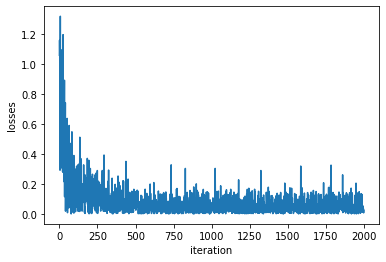

In [18]:
# plotting
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

As we can see, the losses in linear regression with $L = |o -y|$ converge but fluctuate much more than with  $L = (o-y)^2$